__General Context__  
Finding new customers is vital in every industry. The process for finding new customers begins by learning as much as possible from the existing customers. Understanding current customers allow organizations to identify groups of customers that have different product interests, different market participation, or different response to marketing efforts. With this, we will be able not only to serve better our customers, but also to improve the targeting of prospective customers.

Market segmentation, the process of identifying customers’ groups, makes use of geographic, demographic, psychographic, and behavioral characteristics of customers. By understanding the differences between the different segments, organizations can make better strategic choices about opportunities, product definition, positioning, promotions, pricing, and target marketing.

__Business Situation__  
Wonderful Wines of the World (WWW) is a 7-year-old enterprise that seeks out small, unique wineries around the world and brings their wines to its customers. Its mission is to delight its customers with well-made, unique, and interesting wines that would never travel far beyond their points of origin.

WWW sells wines through catalogs and a web site, and ten small stores in major cities around the USA. Customers can purchase at the stores, by telephone (after looking at the catalog), or on the web site. Several hundred selections are available in each new catalog, sent every 6 weeks.

Through aggressive promotion in wine and food magazines, WWW now has 350,000 customers in its database. Most customers are highly involved in wine, entertain frequently, and have sufficient money to indulge their passion for wine. WWW sometimes offers wine accessories as well – wine racks, cork extractors, etc.

WWW is trying to make use of the database it started about 4 years ago. So far, it has simply mass-marketed everything. All customers get the catalog, and there are no loyalty programs or attempts to identify target markets for cross-selling opportunities. Now, WWW wants to “get smart” about its database, and start differentiating customers, and developing more focused programs.

WWW has provided a sample of 10,000 customers from its active database. These are all customers who have purchased something from WWW in the past 18 months (after 18 months with no purchase, a person is eliminated from the active database).

Your job is to segment the database and find the relevant clusters of customers. To do this, we suggest you do 2 different segmentations, one based on engagement (or value of the customer) and a second one based on the buying behavior (or what are the types of wines they tend to buy). In the end you should provide a concatenated/joint view of the segmentation results, but also have each customer assigned to a specific cluster of engagement and a specific cluster of buying behavior. The reason for this is that we would like to understand the value of each customer but also to know what are the wines they will be more interested in buying.

__Additional remarks__  
Note: DRYRED + SWEETRED + DRYWH + SWEETWH + DESSERT = 100%

Notice the data was stored in a XLSX file. There may be some intricacies when reading this file type using Python, feel free to modify/delete rows and/or columns before you read it with Python. Make sure the data is being imported properly and that you remove (before or after converting it to a pandas data frame) any irrelevant rows/columns you may find.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel(r'WonderfulWinesoftheWorld.xlsx',index_col=[0],engine='openpyxl')

#Check duplicate index
data = data.loc[~data.index.duplicated(keep='first')]
data.head(5)

Dayswus   Age   Edu    Income  Freq  Recency  Monetary    LTV  \
Custid                                                                  
5325      653.0  55.0  20.0   78473.0  20.0     18.0     826.0  445.0   
3956     1041.0  75.0  18.0  105087.0  36.0     33.0    1852.0  539.0   
3681      666.0  18.0  12.0   27984.0   4.0     56.0      39.0   -7.0   
2829     1049.0  42.0  16.0   61748.0   2.0     46.0      37.0   -6.0   
8788      837.0  47.0  16.0   65789.0   2.0      3.0      36.0    4.0   

        Perdeal  Dryred  Sweetred  Drywh  Sweetwh  Dessert  Exotic  \
Custid                                                               
5325        7.0    67.0       4.0   26.0      2.0      1.0     1.0   
3956        2.0    49.0       0.0   46.0      1.0      3.0     0.0   
3681       88.0     4.0      29.0   14.0     32.0     21.0    48.0   
2829       70.0    86.0       1.0   11.0      1.0      1.0    55.0   
8788       35.0    85.0       0.0   12.0      2.0      1.0    28.0   

        WebPurchase  WebVisit  
Custid                         
5325           36.0       5.0  
3956           20.0       4.0  
3681           60.0       8.0  
2829           59.0       7.0  
8788           63.0       6.0

### Statistical Description

In [3]:
data.describe().T

count        mean           std      min       25%      50%  \
Dayswus      10000.0    898.1020    202.492789    550.0    723.75    894.0   
Age          10000.0     47.9273     17.302721     18.0     33.00     48.0   
Edu          10000.0     16.7391      1.876375     12.0     15.00     17.0   
Income       10000.0  69904.3580  27612.233311  10000.0  47642.00  70012.0   
Freq         10000.0     14.6281     11.969073      1.0      4.00     12.0   
Recency      10000.0     62.4068     69.874255      0.0     26.00     52.0   
Monetary     10000.0    622.5552    647.135323      6.0     63.00    383.0   
LTV          10000.0    209.0712    291.986040   -178.0     -2.00     57.0   
Perdeal      10000.0     32.3972     27.897094      0.0      6.00     25.0   
Dryred       10000.0     50.3827     23.453815      1.0     32.00     51.0   
Sweetred     10000.0      7.0545      7.866544      0.0      2.00      4.0   
Drywh        10000.0     28.5213     12.583957      1.0     19.00     28.0   
Sweetwh      10000.0      7.0698      8.015083      0.0      2.00      4.0   
Dessert      10000.0      6.9474      7.879546      0.0      2.00      4.0   
Exotic       10000.0     16.5466     17.247672      0.0      4.00     10.0   
WebPurchase  10000.0     42.3762     18.522062      4.0     28.00     45.0   
WebVisit     10000.0      5.2166      2.330457      0.0      3.00      6.0   

                  75%       max  
Dayswus       1074.00    1250.0  
Age             63.00      78.0  
Edu             18.00      20.0  
Income       92147.00  140628.0  
Freq            24.00      56.0  
Recency         78.25     549.0  
Monetary      1077.00    3052.0  
LTV            364.00    1791.0  
Perdeal         56.00      97.0  
Dryred          69.00      99.0  
Sweetred        10.00      75.0  
Drywh           37.00      74.0  
Sweetwh         10.00      62.0  
Dessert          9.00      77.0  
Exotic          23.00      96.0  
WebPurchase     57.00      88.0  
WebVisit         7.00      10.0

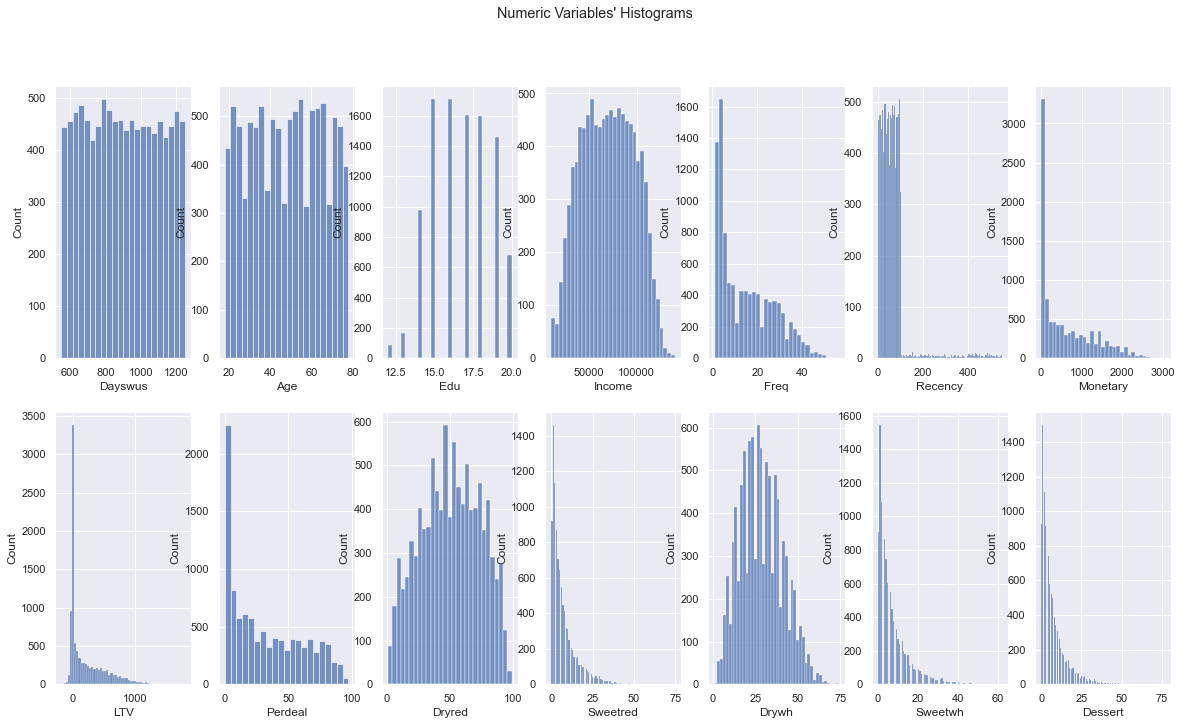

In [4]:
def histogram(data):
    from math import ceil
    metric_features = data.select_dtypes(include=np.number).set_index(data.index).columns
    sns.set()
    fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

    
    for ax, feat in zip(axes.flatten(), metric_features): 

        sns.histplot(data[feat], ax = ax)
        #plt.title(feat)

    
    title = "Numeric Variables' Histograms"

    plt.suptitle(title)

    plt.show()
    
histogram(data.iloc[:,:-3])

### Data Preparation

#### Missing Values

In [5]:
data.isnull().sum()

Dayswus        0
Age            0
Edu            0
Income         0
Freq           0
Recency        0
Monetary       0
LTV            0
Perdeal        0
Dryred         0
Sweetred       0
Drywh          0
Sweetwh        0
Dessert        0
Exotic         0
WebPurchase    0
WebVisit       0
dtype: int64

#### Outliers

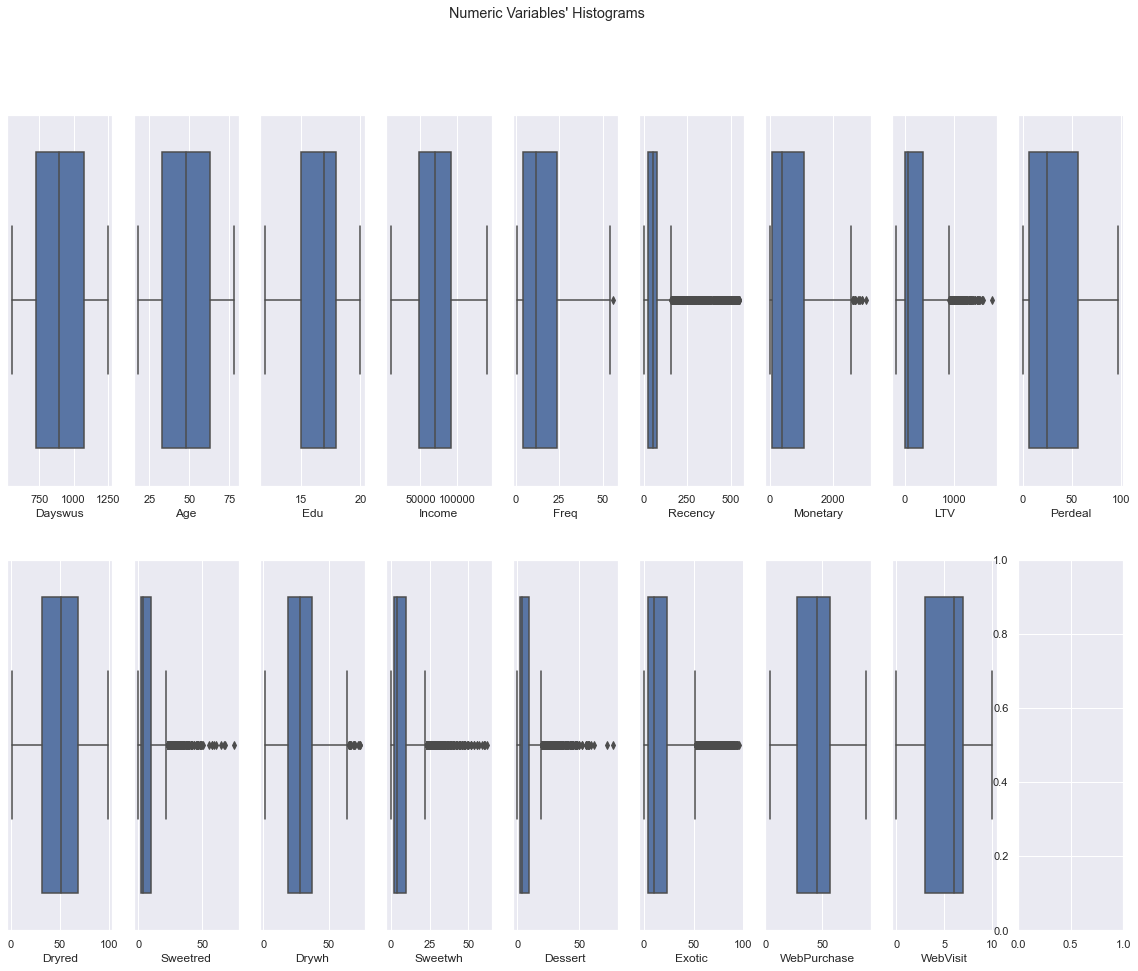

In [6]:
def boxplot (data):
    from math import ceil
    # All Numeric Variables' Histograms in one figure
    metric_features = data.select_dtypes(include=np.number).set_index(data.index).columns
    sns.set()
    # Prepare figure. Create individual axes where each histogram will be placed
    fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 15))

    # Plot data
    # Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
    for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method

        sns.boxplot(data[feat], ax = ax)
        #plt.title(feat)

    # Layout
    # Add a centered title to the figure:
    title = "Numeric Variables' Histograms"

    plt.suptitle(title)

    plt.show()
boxplot(data)

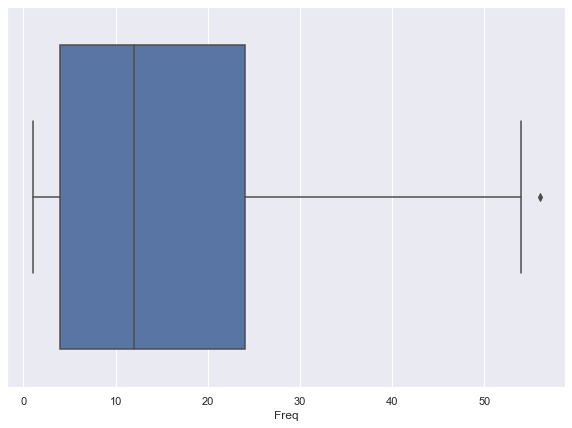

In [7]:
plt.figure(figsize=(10,7))
sns.boxplot(data['Freq'])
plt.show()

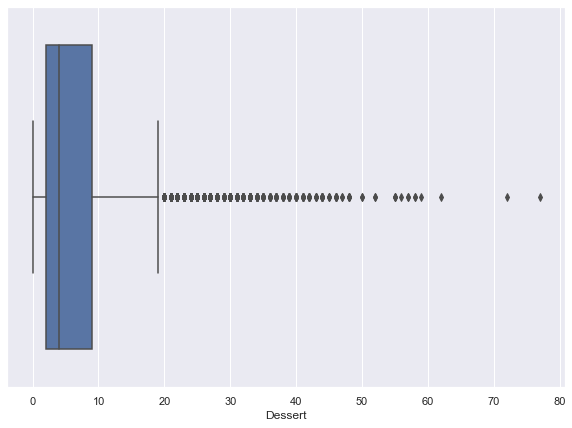

In [8]:
plt.figure(figsize=(10,7))
sns.boxplot(data['Dessert'])
plt.show()

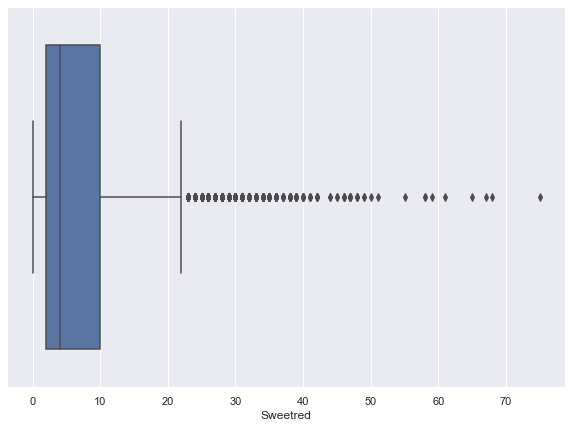

In [9]:
plt.figure(figsize=(10,7))
sns.boxplot(data['Sweetred'])
plt.show()

In [10]:
#check duplicate data
data.loc[data.duplicated(keep=False)]

Empty DataFrame
Columns: [Dayswus, Age, Edu, Income, Freq, Recency, Monetary, LTV, Perdeal, Dryred, Sweetred, Drywh, Sweetwh, Dessert, Exotic, WebPurchase, WebVisit]
Index: []

#### Incoherences

##### Incoherence 1 

In [11]:
incoherences = data.copy()
incoherences['Total'] = data['Sweetred'] + data['Sweetwh']+ data['Dryred'] + data['Drywh'] + data['Dessert']
incoherences.loc[(incoherences['Total']>102) | ((incoherences['Total']<98))]

Empty DataFrame
Columns: [Dayswus, Age, Edu, Income, Freq, Recency, Monetary, LTV, Perdeal, Dryred, Sweetred, Drywh, Sweetwh, Dessert, Exotic, WebPurchase, WebVisit, Total]
Index: []

##### Incoherence 2

In [12]:
incoherences.loc[(incoherences['Age']<18) | (incoherences['Age']>78)]

Empty DataFrame
Columns: [Dayswus, Age, Edu, Income, Freq, Recency, Monetary, LTV, Perdeal, Dryred, Sweetred, Drywh, Sweetwh, Dessert, Exotic, WebPurchase, WebVisit, Total]
Index: []

##### Incoherence 3

In [13]:
incoherences.loc[(incoherences['Recency']>(550)) & (incoherences['Freq']>(0)) ]

Empty DataFrame
Columns: [Dayswus, Age, Edu, Income, Freq, Recency, Monetary, LTV, Perdeal, Dryred, Sweetred, Drywh, Sweetwh, Dessert, Exotic, WebPurchase, WebVisit, Total]
Index: []

##### Incoherence 4

In [14]:
incoherences.loc[(incoherences['Recency']>incoherences['Dayswus'])]

Empty DataFrame
Columns: [Dayswus, Age, Edu, Income, Freq, Recency, Monetary, LTV, Perdeal, Dryred, Sweetred, Drywh, Sweetwh, Dessert, Exotic, WebPurchase, WebVisit, Total]
Index: []

##### Incoherence 5

In [15]:
incoherences.loc[(incoherences['Dayswus'] > (365*4))]

Empty DataFrame
Columns: [Dayswus, Age, Edu, Income, Freq, Recency, Monetary, LTV, Perdeal, Dryred, Sweetred, Drywh, Sweetwh, Dessert, Exotic, WebPurchase, WebVisit, Total]
Index: []

### Data Pre-Processing

#### Feature Engineer

- Annual income to monthly 
- Negative LVT (binary variable)
- Monetary/Freq - average income per purchase

In [3]:
data['Mont_income'] = np.round((data['Income']/12),2)
data.loc[data['LTV']<0,'Neg_LTV'] = 1
data['Neg_LTV'].fillna(value=0,inplace=True)
data['Neg_LTV'] = data['Neg_LTV'].astype(bool)
data['Avg_Purchase'] = np.round((data['Monetary']/data['Freq']),2)
data.head(5)

Dayswus   Age   Edu    Income  Freq  Recency  Monetary    LTV  \
Custid                                                                  
5325      653.0  55.0  20.0   78473.0  20.0     18.0     826.0  445.0   
3956     1041.0  75.0  18.0  105087.0  36.0     33.0    1852.0  539.0   
3681      666.0  18.0  12.0   27984.0   4.0     56.0      39.0   -7.0   
2829     1049.0  42.0  16.0   61748.0   2.0     46.0      37.0   -6.0   
8788      837.0  47.0  16.0   65789.0   2.0      3.0      36.0    4.0   

        Perdeal  Dryred  Sweetred  Drywh  Sweetwh  Dessert  Exotic  \
Custid                                                               
5325        7.0    67.0       4.0   26.0      2.0      1.0     1.0   
3956        2.0    49.0       0.0   46.0      1.0      3.0     0.0   
3681       88.0     4.0      29.0   14.0     32.0     21.0    48.0   
2829       70.0    86.0       1.0   11.0      1.0      1.0    55.0   
8788       35.0    85.0       0.0   12.0      2.0      1.0    28.0   

        WebPurchase  WebVisit  Mont_income  Neg_LTV  Avg_Purchase  
Custid                                                             
5325           36.0       5.0      6539.42    False         41.30  
3956           20.0       4.0      8757.25    False         51.44  
3681           60.0       8.0      2332.00     True          9.75  
2829           59.0       7.0      5145.67     True         18.50  
8788           63.0       6.0      5482.42    False         18.00

#### Data Scalling: Min-Max

In [4]:
def minmax (x):
    x = pd.DataFrame(x)
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler().fit(x)
    x_scaled = scaler.transform(x) # this will return an array
    # Convert the array to a pandas dataframe
    x_scaled = pd.DataFrame(x_scaled, columns = x.columns).set_index(x.index)
    return(x_scaled)
data_scalling = minmax(data.drop(columns=['Neg_LTV']).copy())
data_scalling['Neg_LTV'] = data['Neg_LTV']
data_scalling.head(5)

Dayswus       Age   Edu    Income      Freq   Recency  Monetary  \
Custid                                                                     
5325    0.147143  0.616667  1.00  0.524183  0.345455  0.032787  0.269206   
3956    0.701429  0.950000  0.75  0.727922  0.636364  0.060109  0.606041   
3681    0.165714  0.000000  0.00  0.137673  0.054545  0.102004  0.010834   
2829    0.712857  0.400000  0.50  0.396148  0.018182  0.083789  0.010177   
8788    0.410000  0.483333  0.50  0.427083  0.018182  0.005464  0.009849   

             LTV   Perdeal    Dryred  Sweetred     Drywh   Sweetwh   Dessert  \
Custid                                                                         
5325    0.316404  0.072165  0.673469  0.053333  0.342466  0.032258  0.012987   
3956    0.364144  0.020619  0.489796  0.000000  0.616438  0.016129  0.038961   
3681    0.086846  0.907216  0.030612  0.386667  0.178082  0.516129  0.272727   
2829    0.087354  0.721649  0.867347  0.013333  0.136986  0.016129  0.012987   
8788    0.092433  0.360825  0.857143  0.000000  0.150685  0.032258  0.012987   

          Exotic  WebPurchase  WebVisit  Mont_income  Avg_Purchase  Neg_LTV  
Custid                                                                       
5325    0.010417     0.380952       0.5     0.524184      0.727835    False  
3956    0.000000     0.190476       0.4     0.727922      0.936907    False  
3681    0.500000     0.666667       0.8     0.137674      0.077320     True  
2829    0.572917     0.654762       0.7     0.396148      0.257732     True  
8788    0.291667     0.702381       0.6     0.427083      0.247423    False

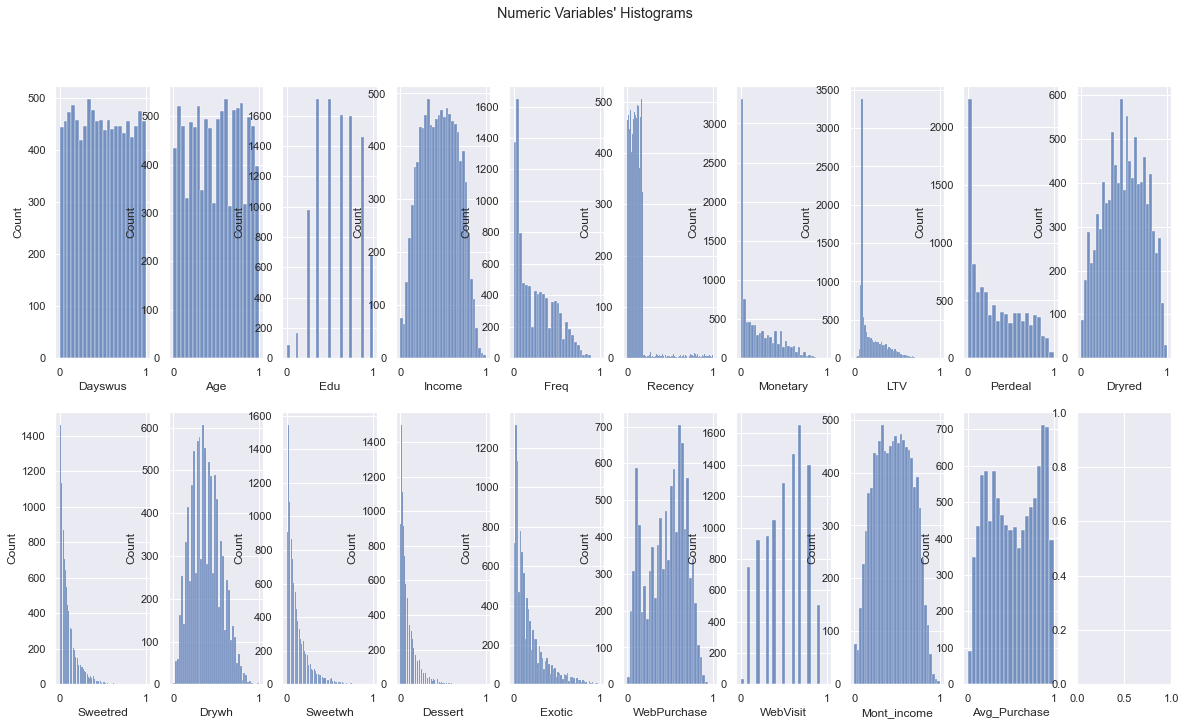

In [18]:
histogram(data_scalling)

#### Negative LTV Analysis

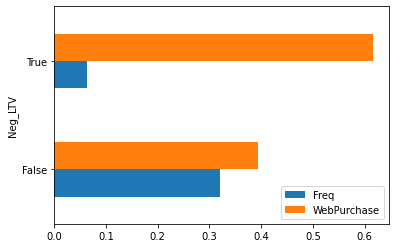

In [27]:
a = data_scalling[['Freq','WebPurchase','Neg_LTV']].groupby('Neg_LTV').mean().plot.barh()

<BarContainer object of 2 artists>

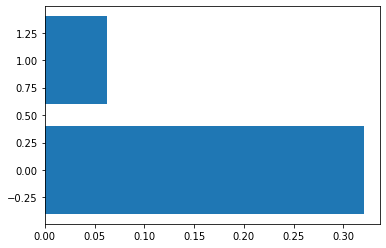

In [25]:
plt.figure()
plt.barh(width=a['Freq'], y=a.index)
plt.

In [12]:
data_scalling[['Age','Income','Freq','Perdeal', 'Exotic','WebPurchase','Neg_LTV']].groupby('Neg_LTV').count().sum(axis=0)

Age            10000
Income         10000
Freq           10000
Perdeal        10000
Exotic         10000
WebPurchase    10000
dtype: int64

In [10]:
data_scalling[['Age','Income','Freq','Perdeal', 'Exotic','WebPurchase','Neg_LTV']].groupby('Neg_LTV').count()

Age  Income   Freq  Perdeal  Exotic  WebPurchase
Neg_LTV                                                    
False    0.718   0.718  0.718    0.718   0.718        0.718
True     0.282   0.282  0.282    0.282   0.282        0.282

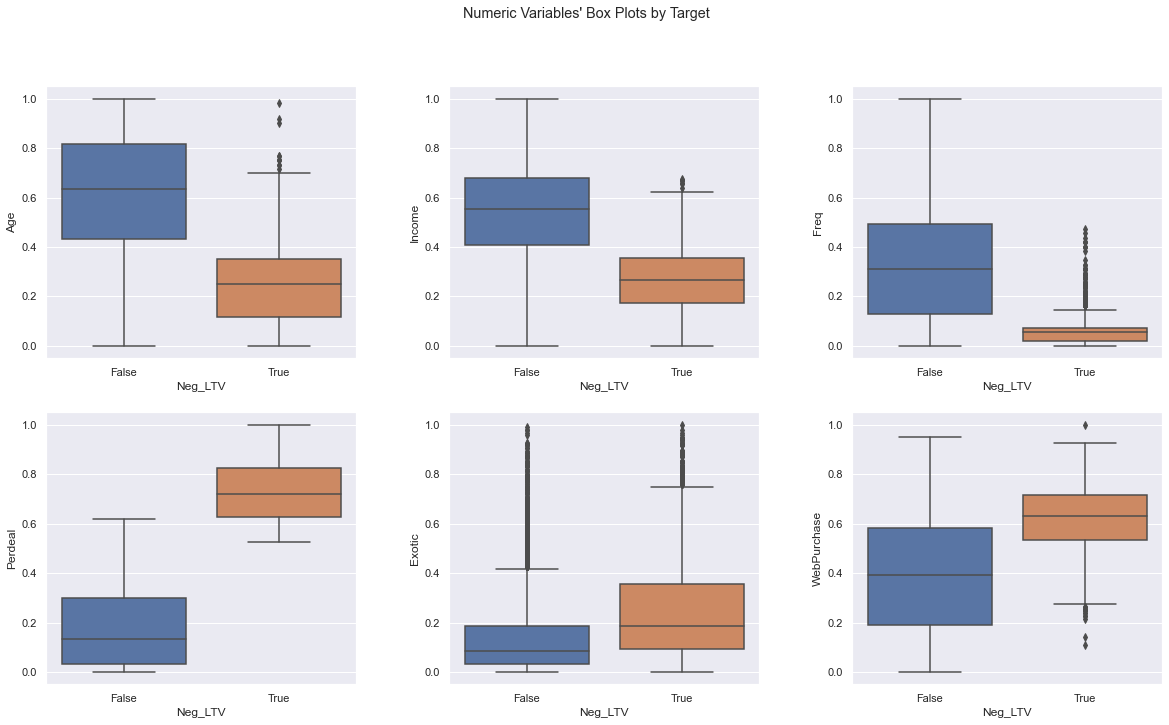

In [19]:
def target_boxplot (data,target):
    from math import ceil
    metric_features = data.select_dtypes(include=np.number).columns
    #data = pd.concat([data[metric_features], data[target]])
    # All Numeric Variables' Box Plots in one figure
    sns.set()

    # Prepare figure. Create individual axes where each box plot will be placed
    fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

    # Plot data
    # Iterate across axes objects and associate each box plot:
    for ax, feat in zip(axes.flatten(), metric_features):
        sns.boxplot(x=data[target], y=data[feat], ax=ax)

    # Layout
    # Add a centered title to the figure:
    title = "Numeric Variables' Box Plots by Target"
    plt.suptitle(title)
    plt.subplots_adjust(wspace=0.3)

    plt.show()
    
target_boxplot(pd.concat([data_scalling[['Age','Income','Freq','Perdeal', 'Exotic','WebPurchase']],data_scalling['Neg_LTV']],axis=1),'Neg_LTV')

### Cluster Modelling

In [102]:
data_modelling = data_scalling.copy()

#### Cluster Perspectives

- __Value Perspective:__ 
- Monetary
- Freq  
- Recency
- LTV
- Avg_Purchase
- Dayswus
  
  
- __Buying Behavior Perspective:__
- Dryred  
- Sweetred  
- Drywh
- Sweetwh
- Dessert
- Exotic
- Perdeal


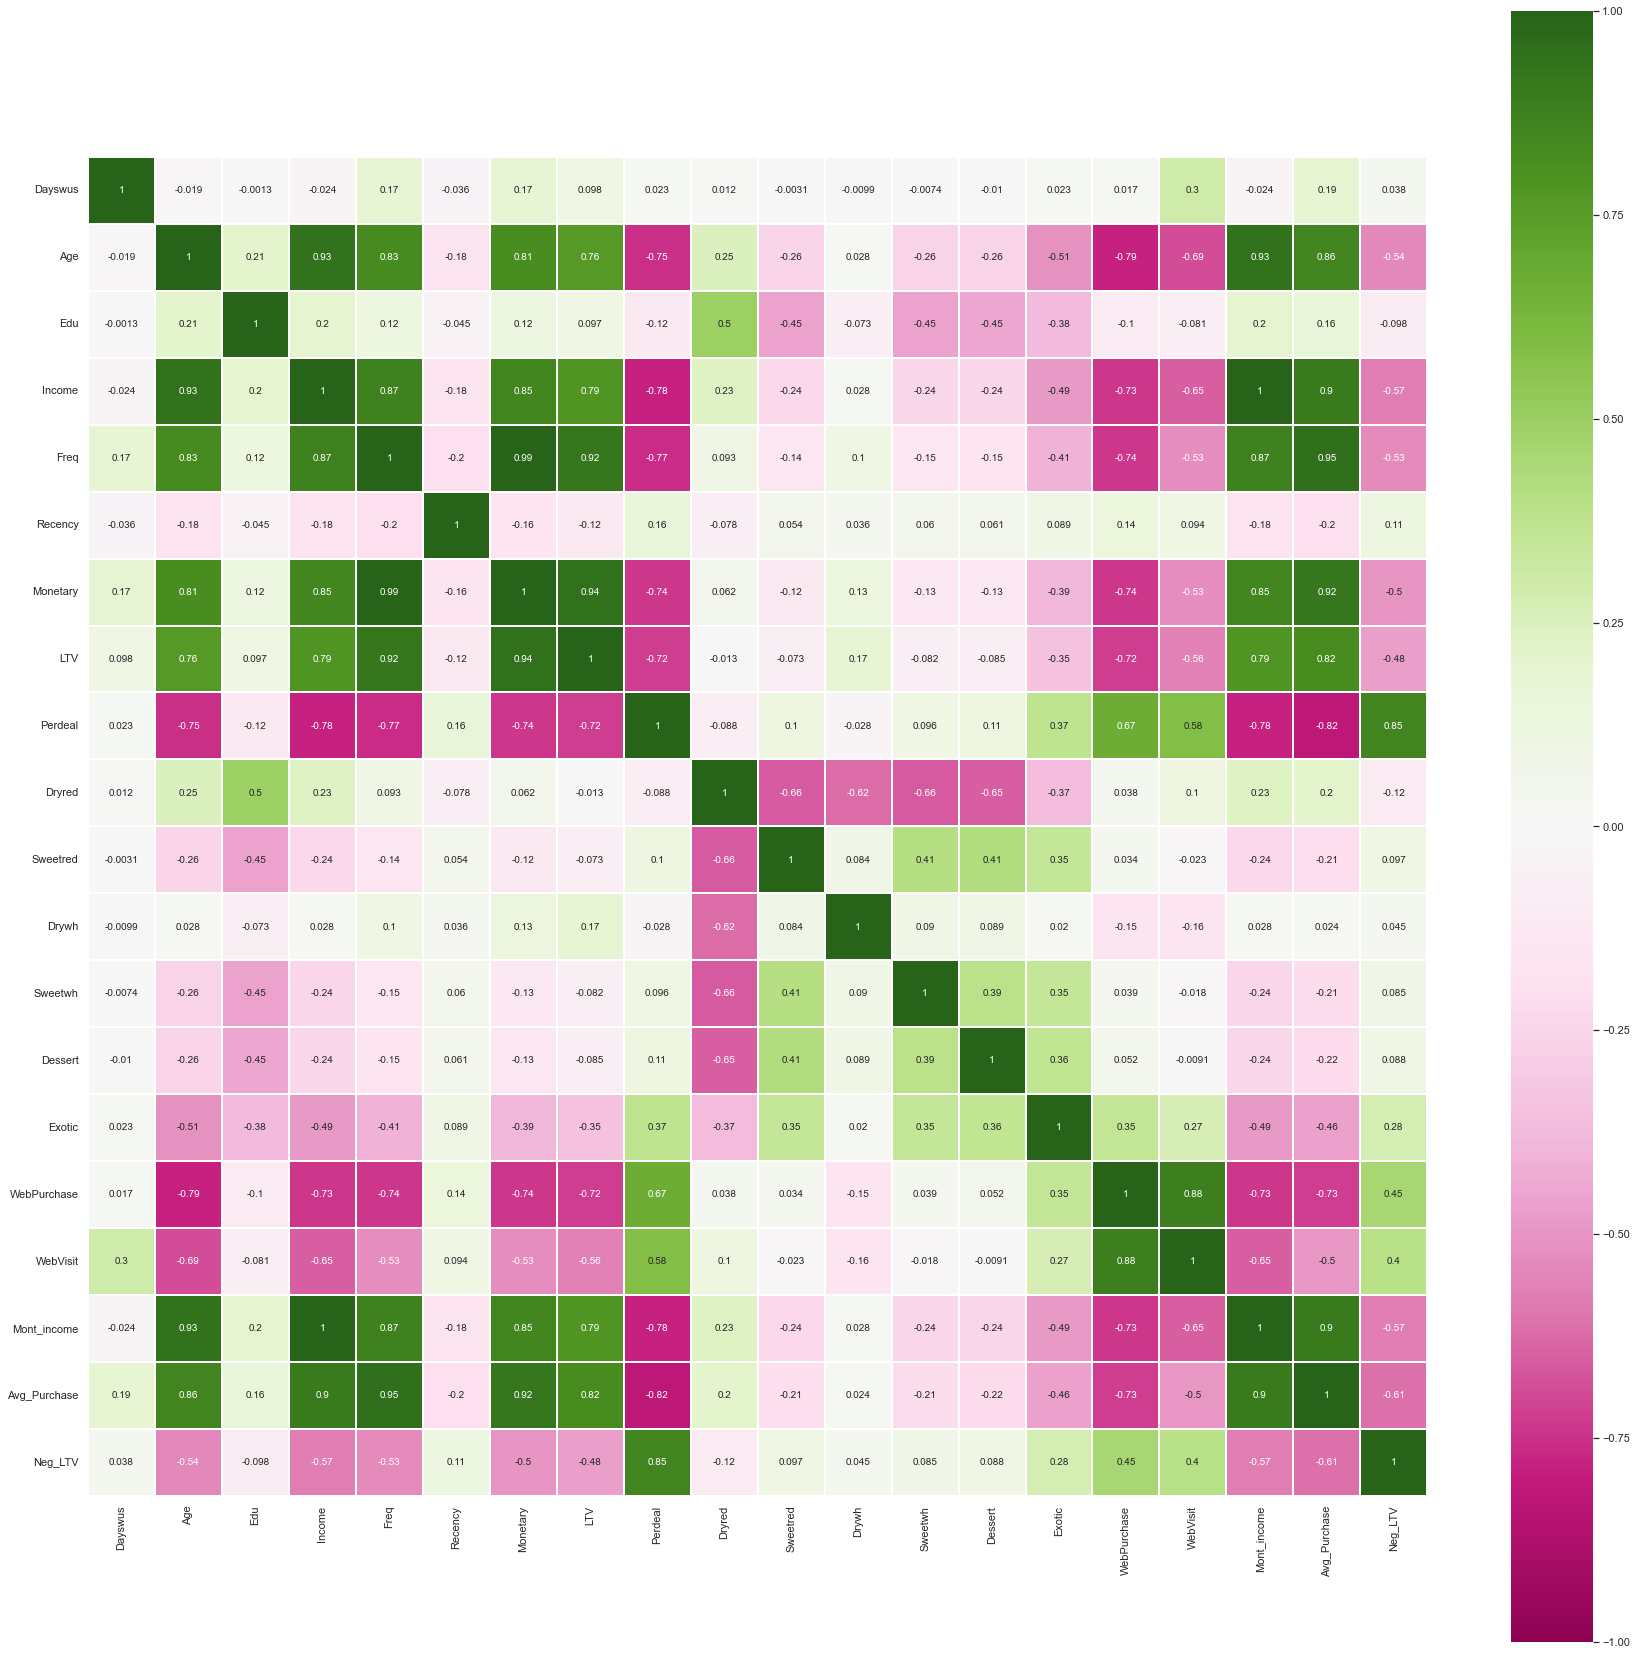

In [21]:
def cor_heat_map (corr):
    plt.figure(figsize = (30, 30))
    sns.heatmap(corr, vmax = 1, vmin=-1, linewidths = 0.1,
               annot = True, annot_kws = {"size": 10}, square = True,cmap="PiYG")
    plt.show()
    
cor_heat_map(data_scalling.corr())

In [22]:
value = ['Recency','Mont_income','LTV','Dayswus']
behavior = ['Perdeal', 'Dryred', 'Sweetred', 'Drywh', 'Sweetwh', 'Dessert',
       'Exotic']

#### Value Perspective Correlation

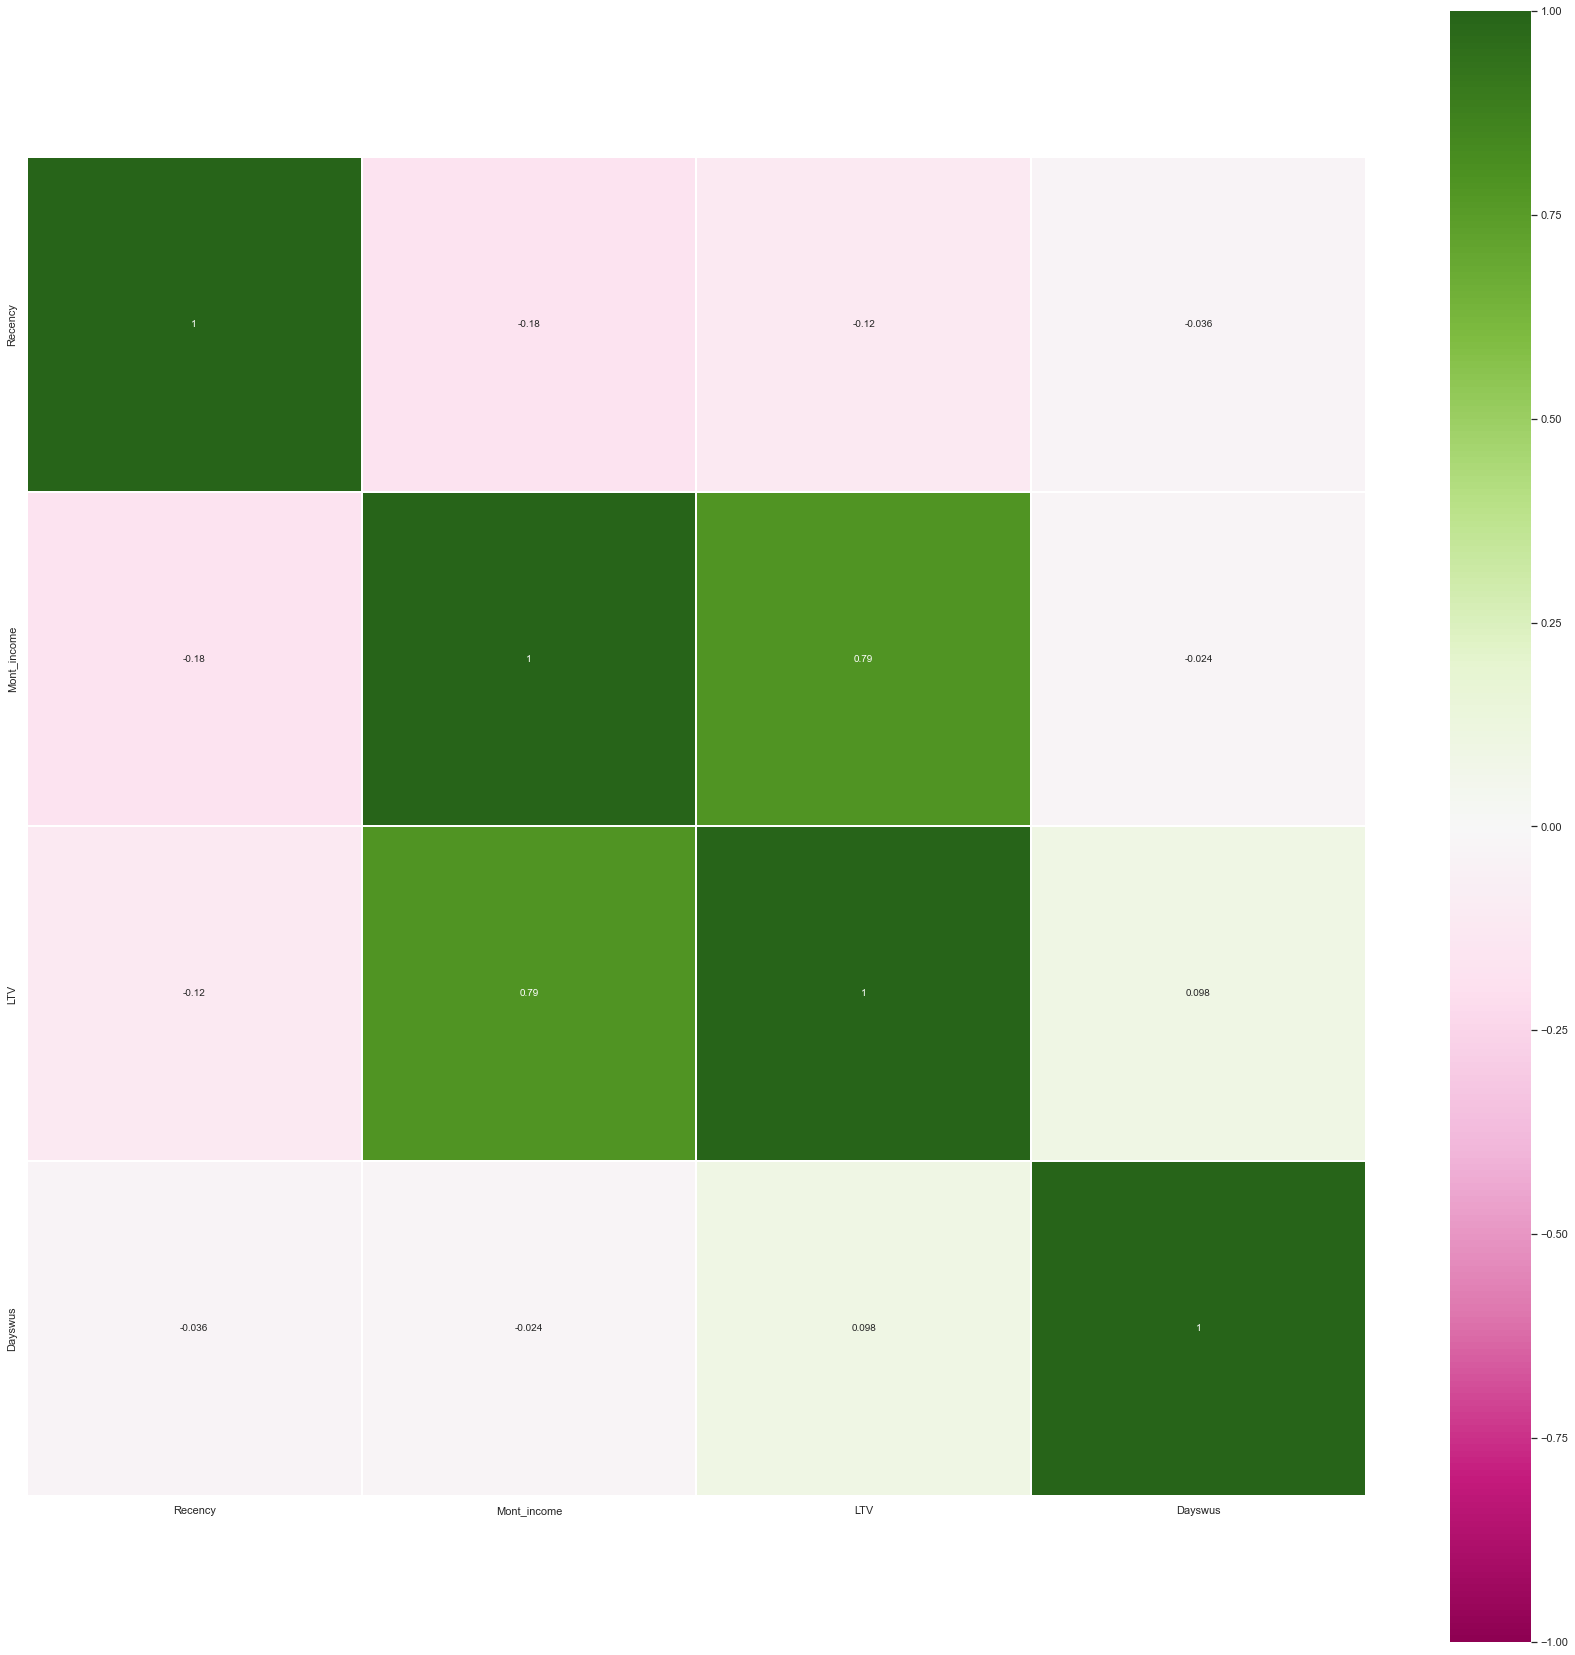

In [23]:
cor_heat_map(data_scalling[value].corr())

##### Buying Behavior Perspective Correlation

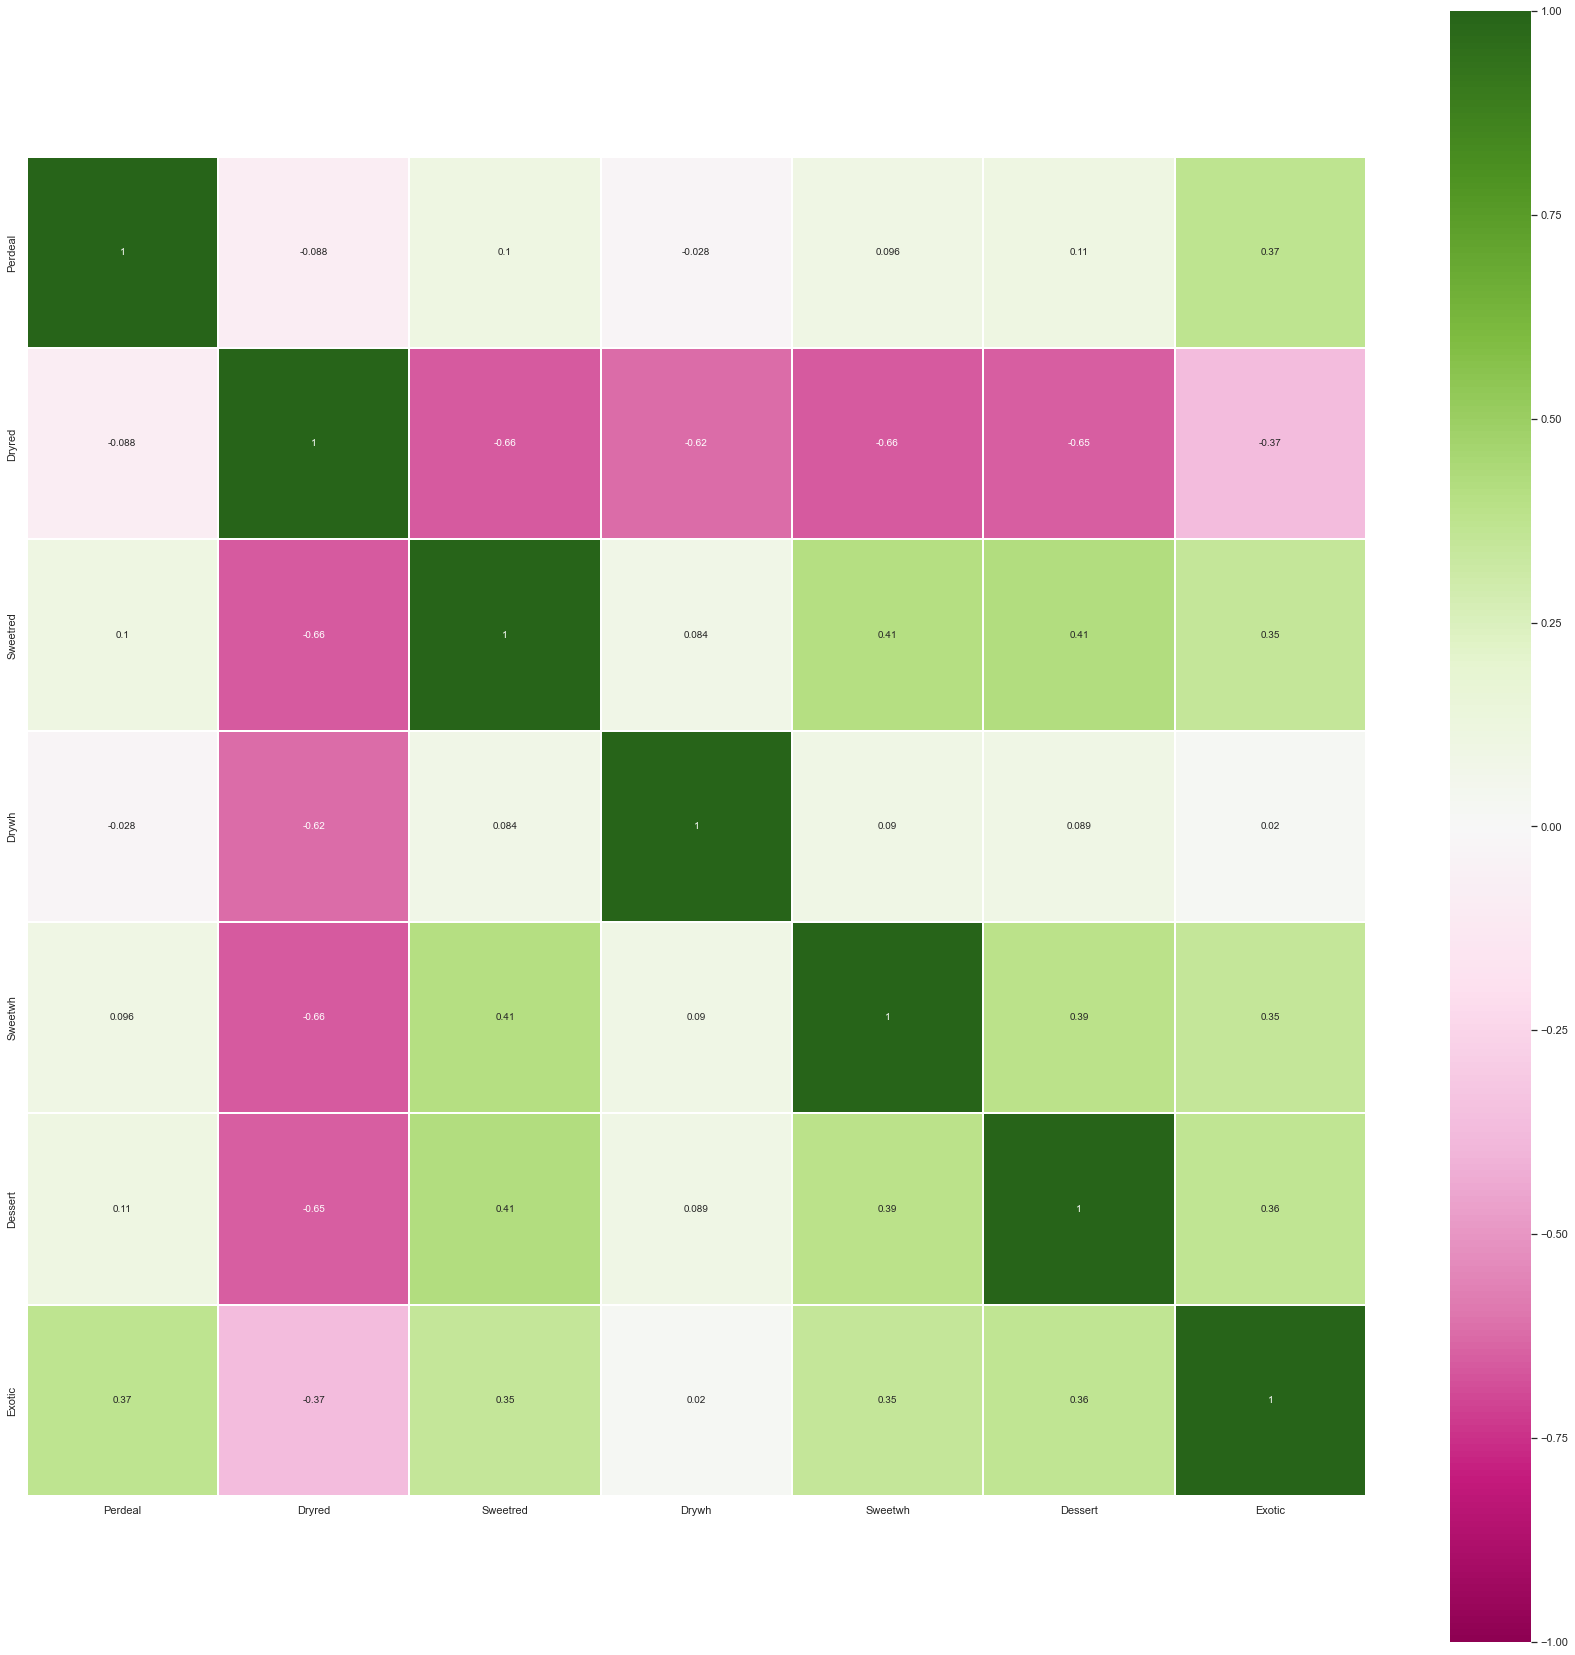

In [24]:
cor_heat_map(data_scalling[behavior].corr())

In [103]:
def calculate_r2 (df, labels,cluster_method):
    def get_ss(df):
        ss = np.sum(df.var() * (df.count() - 1))
        return ss  # return sum of sum of squares of each df variable

    sst = get_ss(df)  # get total sum of squares
    df_concat = pd.concat([df, pd.Series(labels, index=df.index, name=f'{cluster_method}_labels')], axis=1)
    
    
    ssw_labels = df_concat.groupby(by=f'{cluster_method}_labels').apply(get_ss)  # compute ssw for each cluster labels
    ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
    r2 = ssb / sst
    print("Cluster solution with R^2 of %0.4f" % r2)
    return(r2)

#### Hierarquical Clustering 

###### Hierarquical Functions

In [104]:
def hierarquical_assess (data,max_clust):
    def return_r2 (df,labels):
        def get_ss(df):
            ss = np.sum(df.var() * (df.count() - 1))
            return ss  # return sum of sum of squares of each df variable

        sst = get_ss(df)  # get total sum of squares
        df_concat = pd.concat([df, pd.Series(labels, index=df.index, name=f'labels')], axis=1)


        ssw_labels = df_concat.groupby(by=f'labels').apply(get_ss)  # compute ssw for each cluster labels
        ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
        r2 = ssb / sst
        return(r2)
    
    def multiple_R2_HCluster (data,k_range, linkage):
        
        from sklearn.cluster import AgglomerativeClustering
        results = []
        for i in k_range+1:
            cluster_solution = AgglomerativeClustering(n_clusters=i,linkage=linkage )
            cluster_labels = cluster_solution.fit_predict(data)
            results.append(return_r2(data,cluster_labels))
            #print(calculate_r2(data,cluster_labels,'cluster_R2'))
        return(results)
    
    result = pd.DataFrame()
    for i in ["ward", "complete", "average", "single"]:
        result[i] = multiple_R2_HCluster(data,np.arange(1,max_clust),i)


    fig = plt.figure(figsize=(11,5))
    sns.lineplot(data=result,linewidth=2.5, markers=["o"]*4)
    fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
    plt.gca().invert_xaxis()  # invert x axis
    plt.legend(title="HC methods", title_fontsize=11)
    plt.xticks(range(1, max_clust + 1))
    plt.xlabel("Number of clusters", fontsize=13)
    plt.ylabel("R2 metric", fontsize=13)

    plt.show()
    return(result)


def dendogram (cluster_model,threshold,linkage,distance):
    from scipy.cluster.hierarchy import dendrogram
    hclust = cluster_model
    # Adapted from:
    # https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

    # create the counts of samples under each node (number of points being merged)
    counts = np.zeros(hclust.children_.shape[0])
    n_samples = len(hclust.labels_)

    # hclust.children_ contains the observation ids that are being merged together
    # At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
    for i, merge in enumerate(hclust.children_):
        # track the number of observations in the current cluster being formed
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                # If this is True, then we are merging an observation
                current_count += 1  # leaf node
            else:
                # Otherwise, we are merging a previously formed cluster
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    # the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
    # the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
    # the counts indicate the number of points being merged (dendrogram's x-axis)
    linkage_matrix = np.column_stack(
        [hclust.children_, hclust.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    sns.set()
    fig = plt.figure(figsize=(20,10))
    # The Dendrogram parameters need to be tuned
    y_threshold = threshold
    dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
    plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
    plt.title(f'Hierarchical Clustering - {linkage}\'s Dendrogram', fontsize=21)
    plt.xlabel('Number of points in node (or index of point if no parenthesis)')
    plt.ylabel(f'{distance} Distance', fontsize=13)
    plt.show()
    



#### Value Perspective 

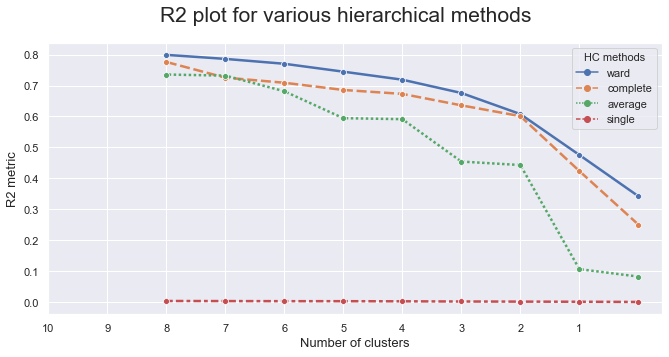

ward  complete   average    single
0  0.342215  0.250429  0.082374  0.000405
1  0.475582  0.423637  0.106464  0.001065
2  0.607766  0.601119  0.443023  0.001512
3  0.675943  0.635993  0.454254  0.001891
4  0.718941  0.673014  0.591353  0.002467
5  0.744868  0.685710  0.594481  0.002838
6  0.770419  0.709045  0.681607  0.002895
7  0.786171  0.725568  0.732145  0.003209
8  0.799225  0.776320  0.735631  0.003517

In [27]:
hierarquical_assess(data_modelling[value],10)

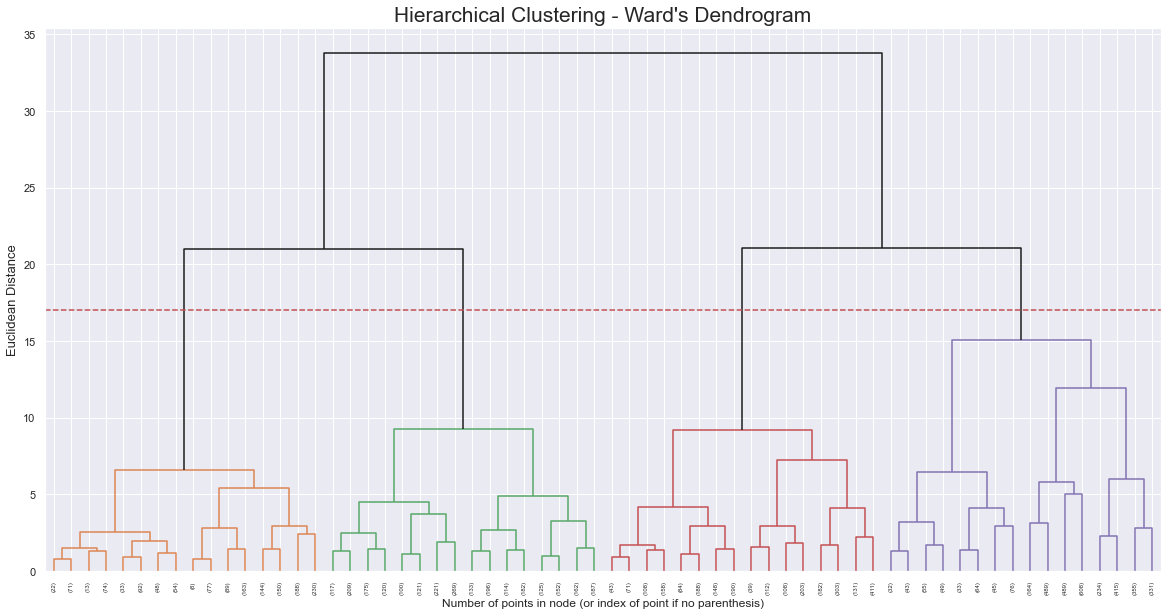

In [28]:
from sklearn.cluster import AgglomerativeClustering 
hc_cluster = AgglomerativeClustering(linkage='ward',affinity='euclidean',n_clusters=None,distance_threshold=0)
hc_cluster.fit(data_modelling[value])
dendogram(hc_cluster,17,'Ward','Euclidean')

In [105]:
from sklearn.cluster import AgglomerativeClustering
hc_value = AgglomerativeClustering(linkage='ward',affinity='euclidean',n_clusters=4)
hc_value_labels = hc_value.fit_predict(data_modelling[value])
hc_profile = data_modelling.copy()
hc_profile['HC_Value'] = hc_value_labels

In [30]:
def multiple_radar_plot (data,columns):
    sns.set_style("whitegrid") 
    labels  = list(columns)
    labels = [*labels, labels[0]]
    col = data.iloc[1,:]
    col = [*col, col[0]]
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(columns)+1)
    
    plt.figure(figsize=(10, 7))
    plt.subplot(polar=True)
    for i in range(len(data)):
        
        df = data.iloc[i,:]
        df = [*df, df[0]]
        plt.plot(label_loc, df,label =f'{data.index[i]}', )
        #plt.fill(label_loc, df, alpha=0.4)
        
        
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=labels)
    plt.legend(loc='center left',bbox_to_anchor=(1, 1))
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    
def max_highlight(cell_value):
    highlight = 'background-color: lightgreen;'
    default = ''
    for column in a:
        if cell_value == max(a[column], key = abs):
            return highlight
    return default

In [31]:
a = hc_profile.groupby('HC_Value').mean()[value]
a.style.applymap(max_highlight)

In [32]:
hc_profile.groupby('HC_Value').count()['Age']

HC_Value
0    3482
1    2583
2    2479
3    1456
Name: Age, dtype: int64

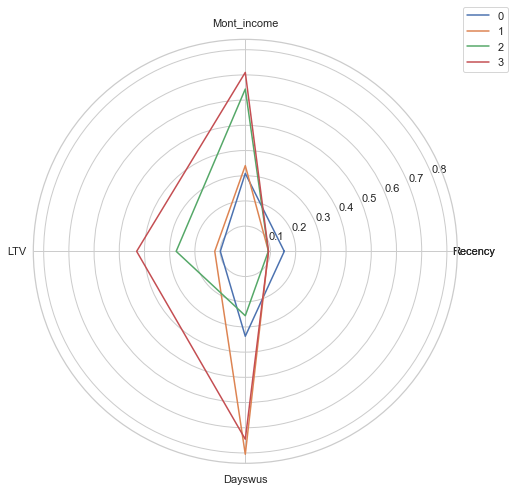

In [33]:
multiple_radar_plot(hc_profile.groupby('HC_Value').mean()[value], hc_profile.groupby('HC_Value').mean()[value].columns)

In [34]:
calculate_r2(hc_profile[value],hc_profile['HC_Value'],'HC')

Cluster solution with R^2 of 0.6078


0.6077656810872921

#### Buying Behavior Perspective

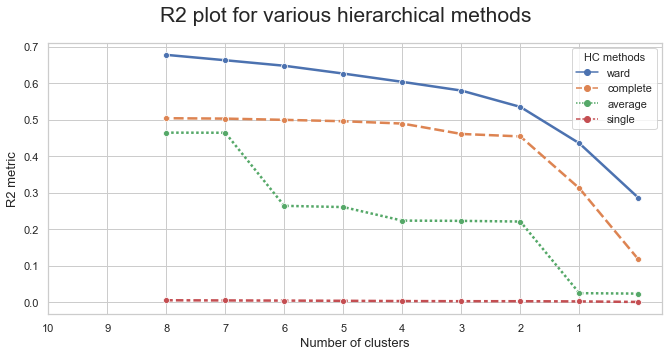

ward  complete   average    single
0  0.285722  0.117099  0.023375  0.000517
1  0.435144  0.311874  0.024547  0.001988
2  0.534893  0.454075  0.220815  0.002519
3  0.579714  0.460798  0.222651  0.002549
4  0.603554  0.489277  0.223367  0.002914
5  0.626247  0.495634  0.260494  0.003670
6  0.647678  0.499447  0.263833  0.004233
7  0.662767  0.502861  0.464113  0.004656
8  0.677531  0.503895  0.464376  0.005105

In [35]:
hierarquical_assess(data_modelling[behavior],10)

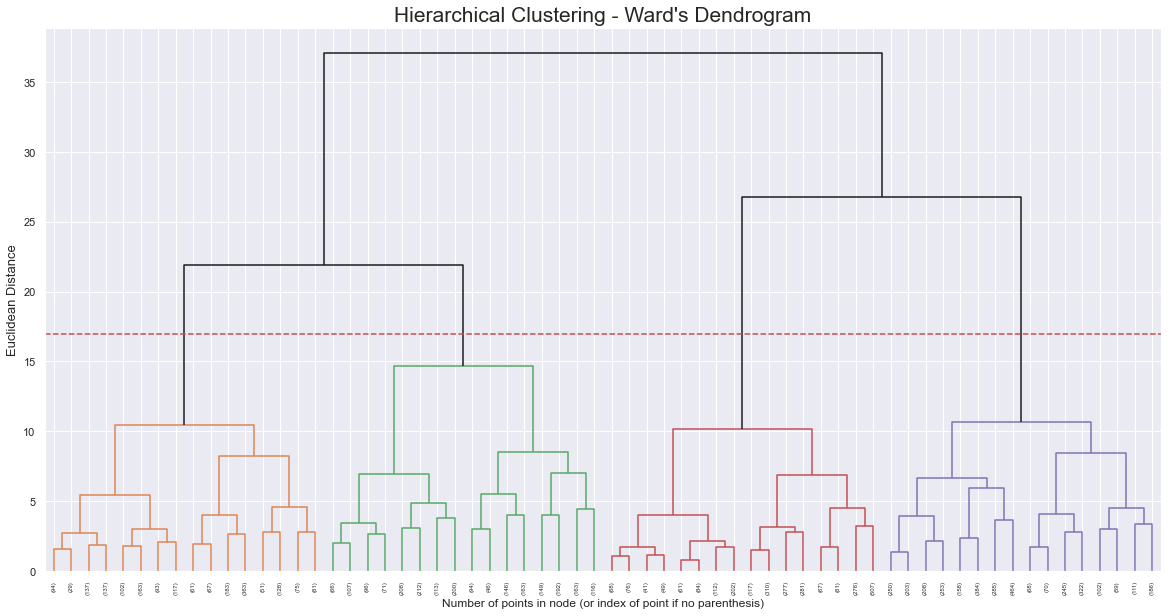

In [36]:
hc_cluster = AgglomerativeClustering(linkage='ward',affinity='euclidean',n_clusters=None,distance_threshold=0)
hc_cluster.fit(data_modelling[behavior])
dendogram(hc_cluster,17,'Ward','Euclidean')

In [106]:
hc_behavior = AgglomerativeClustering(linkage='ward',affinity='euclidean',n_clusters=4)
hc_behavior_labels = hc_behavior .fit_predict(data_modelling[behavior])
hc_profile['HC_Behavior'] = hc_behavior_labels

In [38]:
a = hc_profile.groupby('HC_Behavior').mean()[behavior]
a.style.applymap(max_highlight)

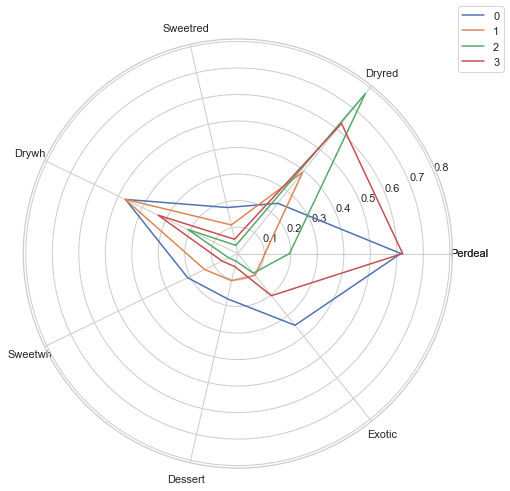

In [39]:
multiple_radar_plot(hc_profile.groupby('HC_Behavior').mean()[behavior],hc_profile.groupby('HC_Behavior').mean()[behavior].columns)

In [40]:
calculate_r2(hc_profile[behavior],hc_profile['HC_Behavior'],'HC')

Cluster solution with R^2 of 0.5349


0.5348934707245587

### K-Means

#### Value Perspective 

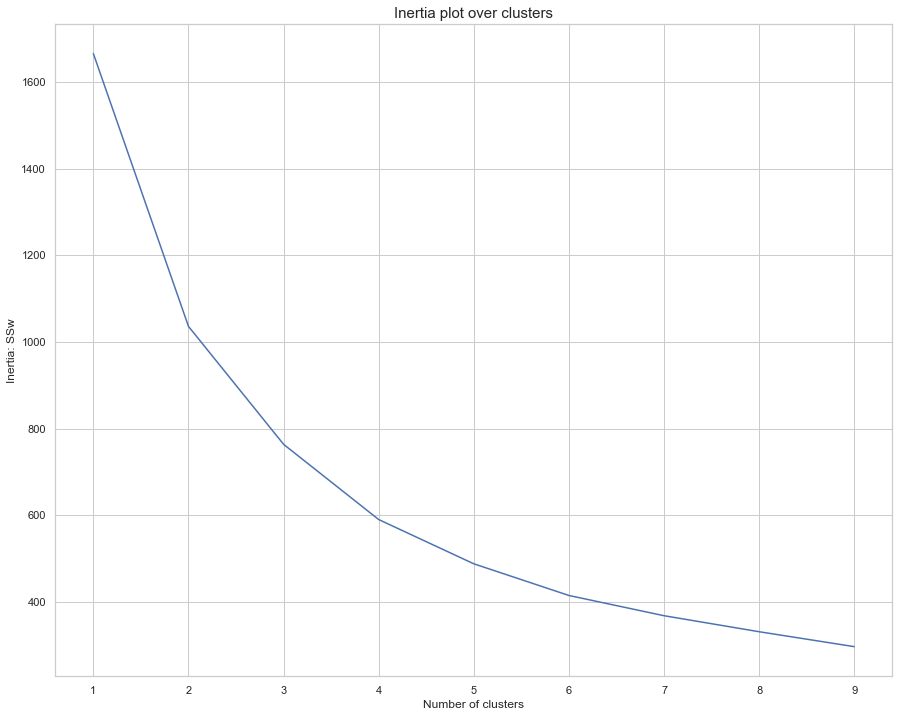

In [42]:
def inertiaPlot (data,ranges):
    from sklearn.cluster import KMeans
    range_clusters = ranges
    inertia = []
    for i in range_clusters:  # iterate over desired ncluster range
        kmclust =  KMeans(n_clusters=i, init='k-means++', n_init=15, random_state=1)
        kmclust.fit(data)
        # CODE HERE
        inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution
        
    plt.figure(figsize=(15,12))
    plt.plot(pd.Series(inertia,index=ranges))
    plt.ylabel("Inertia: SSw")
    plt.xlabel("Number of clusters")
    plt.title("Inertia plot over clusters", size=15)
    plt.show()
inertiaPlot(data_modelling[value],np.arange(1,10))

For n_clusters = 2, the average silhouette_score is : 0.3507188329627807
For n_clusters = 3, the average silhouette_score is : 0.3427175204995558
For n_clusters = 4, the average silhouette_score is : 0.33065555289220977
For n_clusters = 5, the average silhouette_score is : 0.3505729745733695
For n_clusters = 6, the average silhouette_score is : 0.32961547438739974
For n_clusters = 7, the average silhouette_score is : 0.3232426640374664
For n_clusters = 8, the average silhouette_score is : 0.30497775023733176
For n_clusters = 9, the average silhouette_score is : 0.2978496882840198


[0.3507188329627807,
 0.3427175204995558,
 0.33065555289220977,
 0.3505729745733695,
 0.32961547438739974,
 0.3232426640374664,
 0.30497775023733176,
 0.2978496882840198]

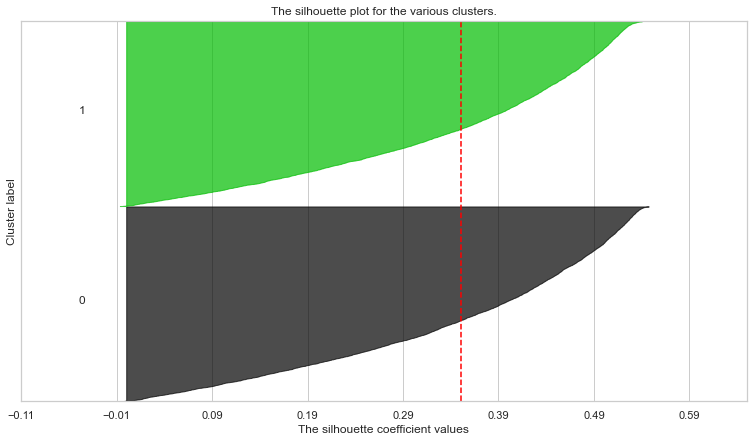

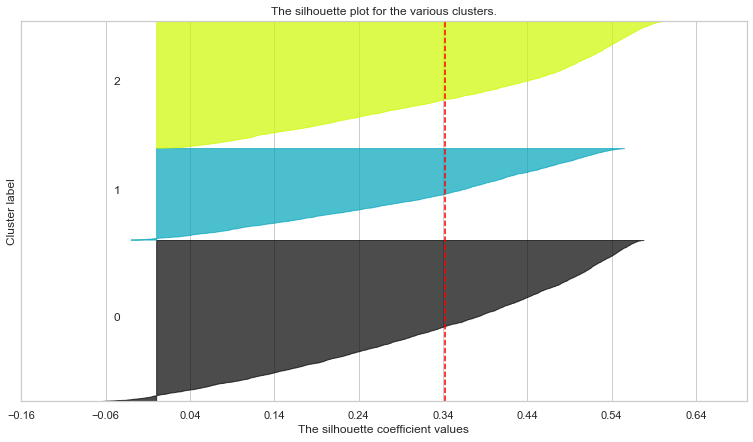

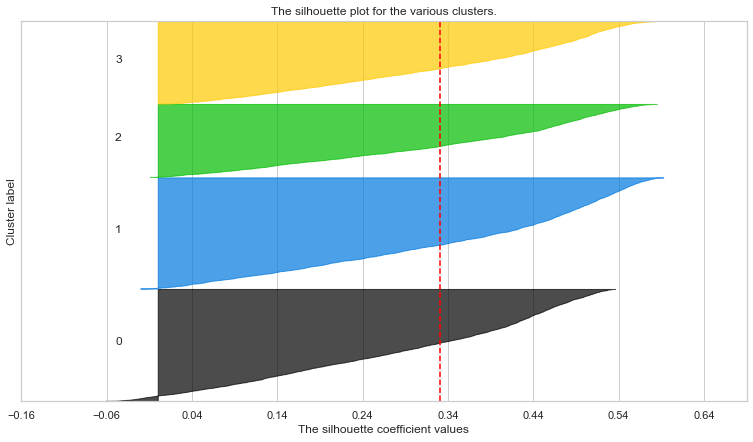

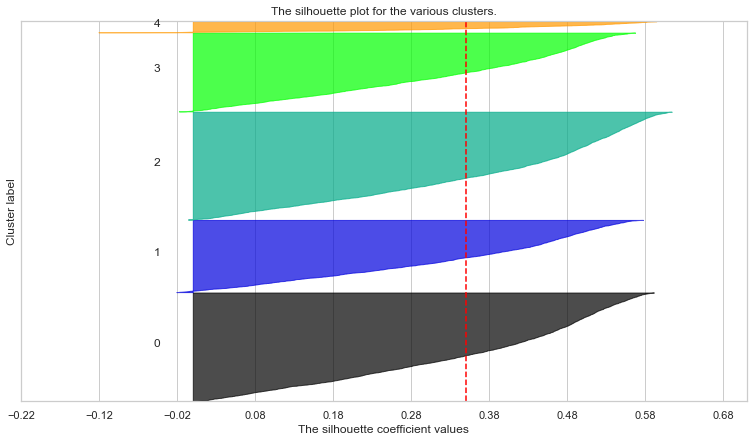

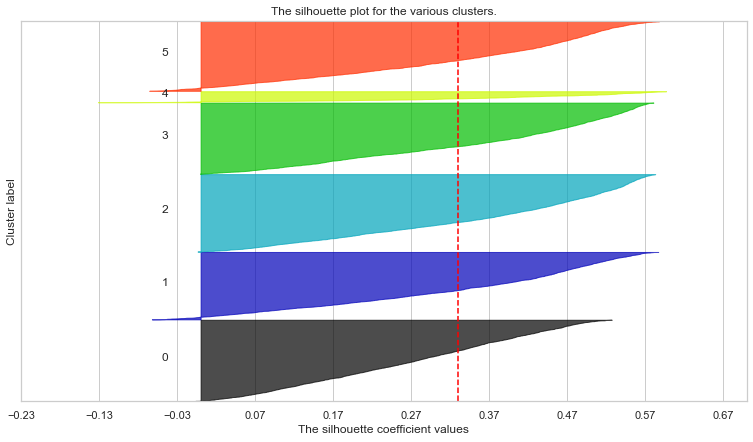

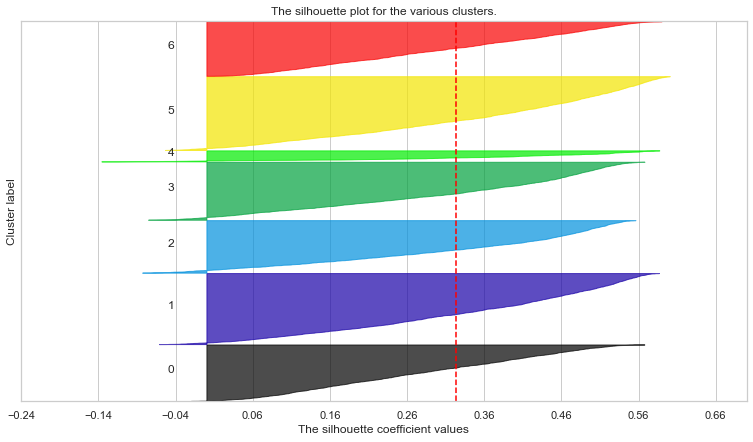

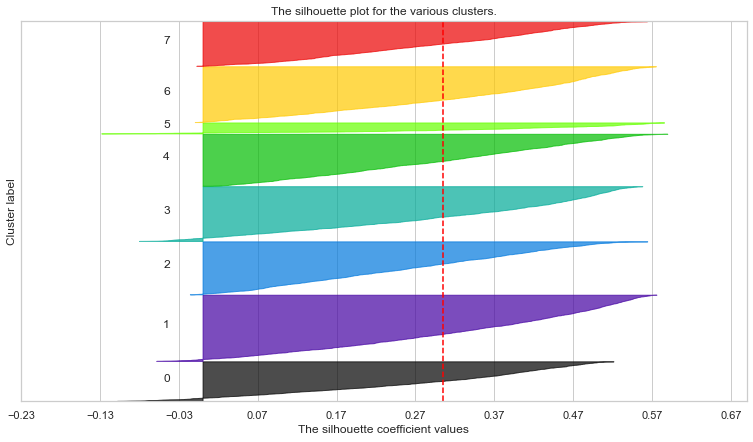

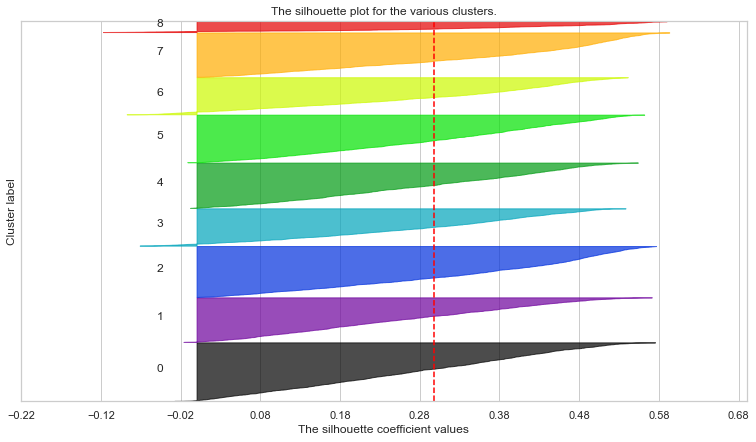

In [43]:
def assess_kmeans (data, ranges):
    from os.path import join
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score
    import matplotlib.cm as cm
    # Adapted from:
    # https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py
    range_clusters=ranges
    # Storing average silhouette metric
    avg_silhouette = []
    for nclus in range_clusters:
        # Skip nclus == 1
        if nclus == 1:
            continue

        # Create a figure
        fig = plt.figure(figsize=(13, 7))

        # Initialize the KMeans object with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
        cluster_labels = kmclust.fit_predict(data)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg =  silhouette_score(data, cluster_labels)
        avg_silhouette.append(silhouette_avg)
        print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(data , cluster_labels)

        y_lower = 10
        for i in range(nclus):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            # Get y_upper to demarcate silhouette y range size
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            # Filling the silhouette
            color = cm.nipy_spectral(float(i) / nclus)
            plt.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        plt.title("The silhouette plot for the various clusters.")
        plt.xlabel("The silhouette coefficient values")
        plt.ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        plt.axvline(x=silhouette_avg, color="red", linestyle="--")

        # The silhouette coefficient can range from -1, 1
        xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
        plt.xlim([xmin, xmax])

        # The (nclus+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        plt.ylim([0, len(data) + (nclus + 1) * 10])

        plt.yticks([])  # Clear the yaxis labels / ticks
        plt.xticks(np.arange(xmin, xmax, 0.1))
    return(avg_silhouette)

assess_kmeans(data_modelling[value],np.arange(1,10))

In [107]:
from sklearn.cluster import KMeans
kmeans_value = KMeans(init='k-means++', n_init=10,n_clusters=3,random_state=10)
kvalue_labels = kmeans_value.fit_predict(data_modelling[value])
kmeans_profile = data_modelling.copy()
kmeans_profile['Value'] = kvalue_labels

In [45]:
a = kmeans_profile.groupby('Value').mean()[value]
a.style.applymap(max_highlight)

In [46]:
kmeans_profile.groupby('Value').count()['Age']

Value
0    4244
1    3331
2    2425
Name: Age, dtype: int64

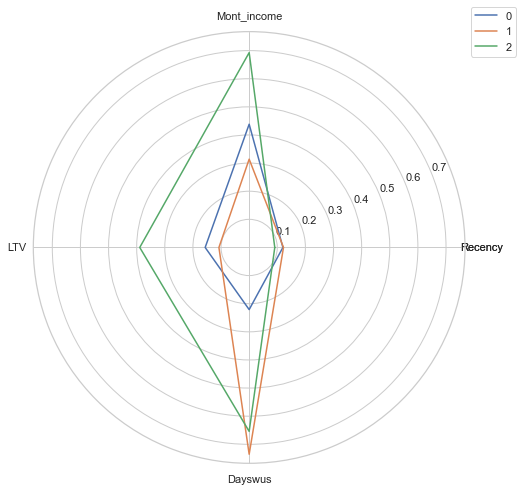

In [47]:
multiple_radar_plot(a, a.columns)

In [48]:
calculate_r2(kmeans_profile[value],kmeans_profile['Value'],'KMeans')

Cluster solution with R^2 of 0.5415


0.5414644687224274

#### Behavior Perspective 

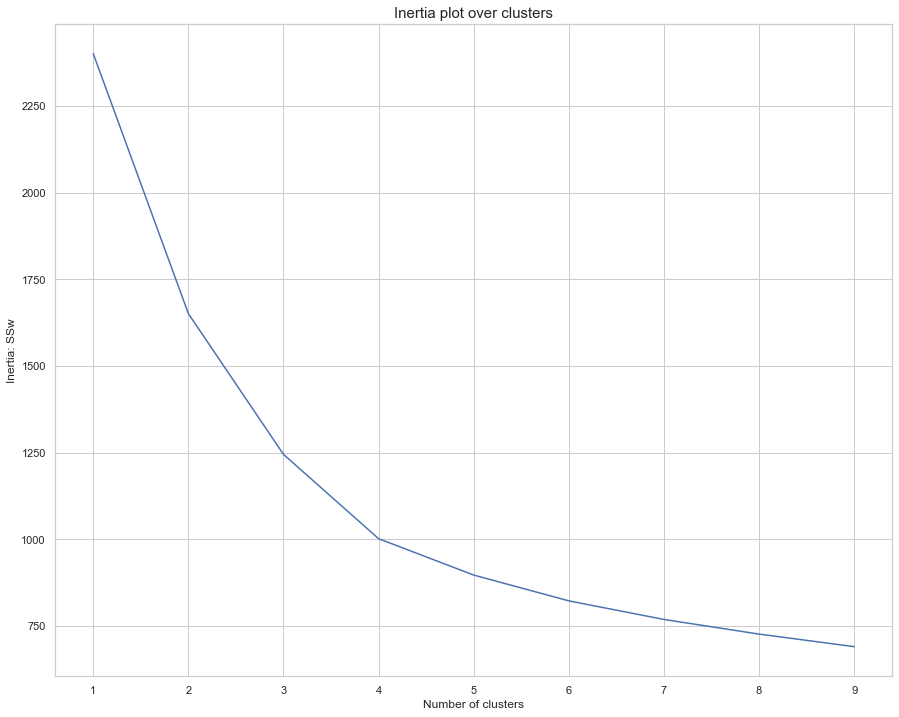

In [49]:
inertiaPlot(data_modelling[behavior],np.arange(1,10))

For n_clusters = 2, the average silhouette_score is : 0.322299466698374
For n_clusters = 3, the average silhouette_score is : 0.28940453587652964
For n_clusters = 4, the average silhouette_score is : 0.2993000036478241
For n_clusters = 5, the average silhouette_score is : 0.28164206239205786
For n_clusters = 6, the average silhouette_score is : 0.23136845310192167
For n_clusters = 7, the average silhouette_score is : 0.23310642304055124
For n_clusters = 8, the average silhouette_score is : 0.23476038181301784
For n_clusters = 9, the average silhouette_score is : 0.2331029844159973


[0.322299466698374,
 0.28940453587652964,
 0.2993000036478241,
 0.28164206239205786,
 0.23136845310192167,
 0.23310642304055124,
 0.23476038181301784,
 0.2331029844159973]

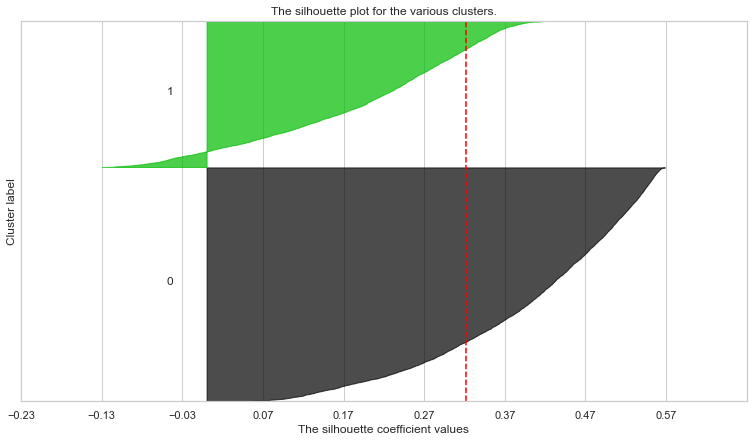

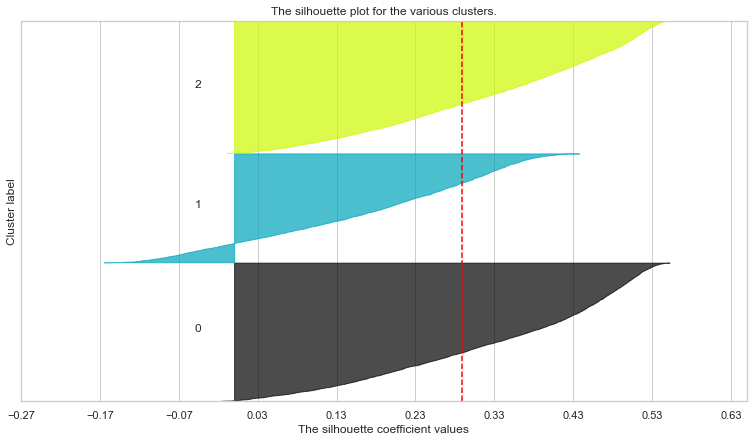

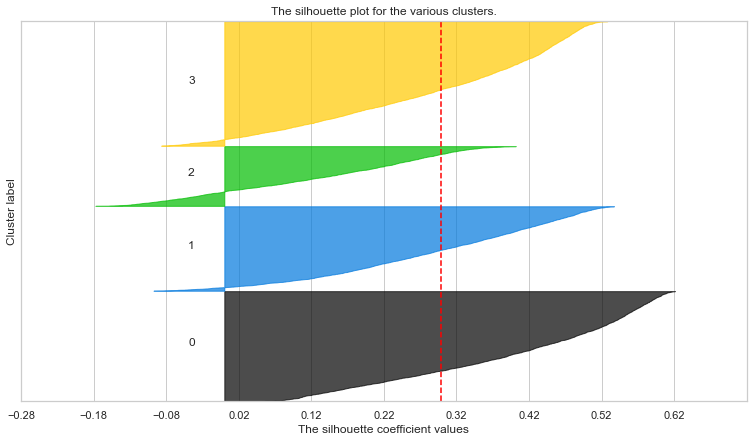

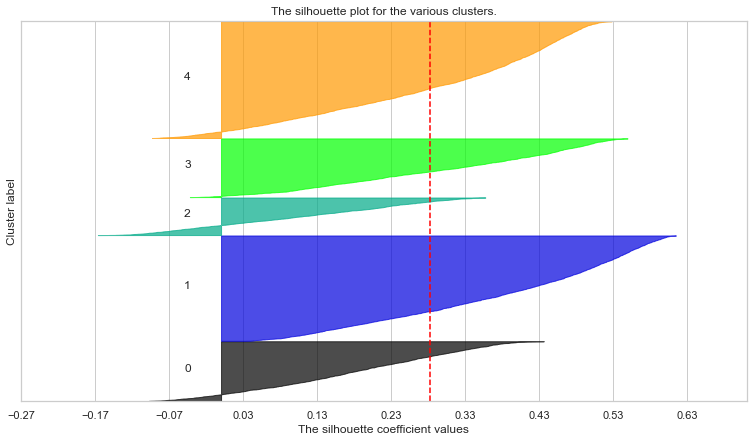

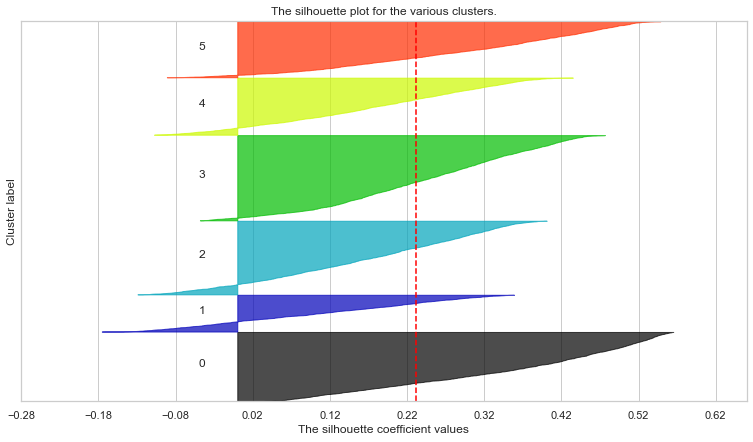

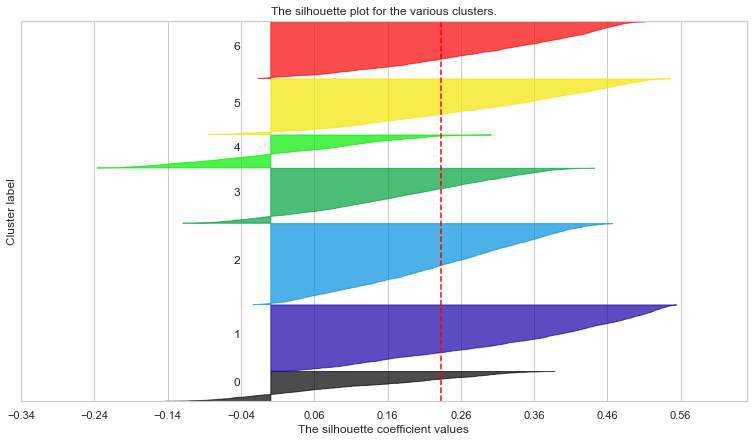

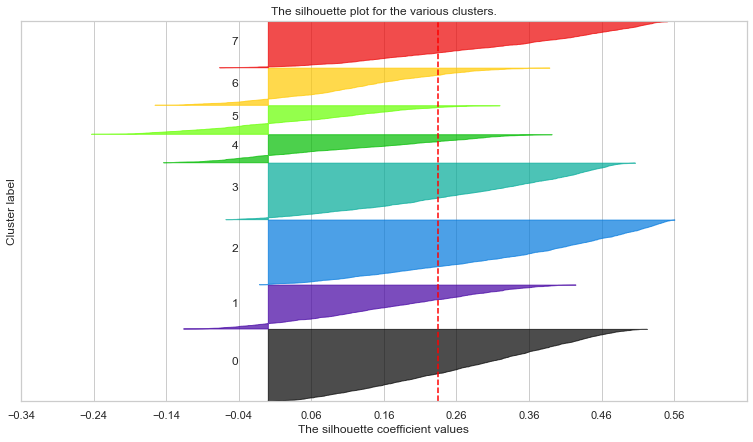

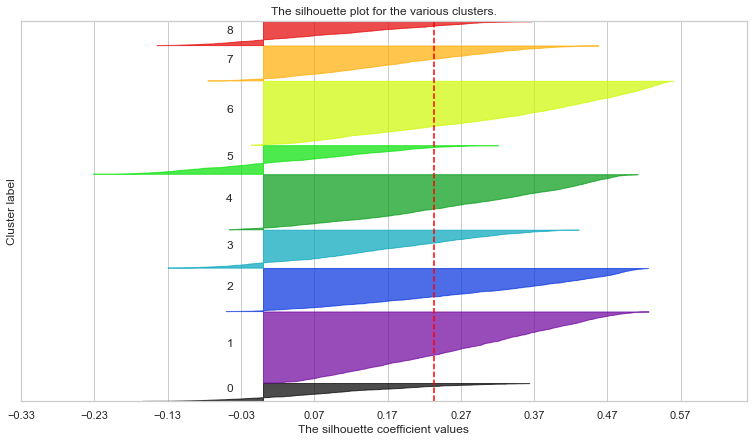

In [50]:
assess_kmeans(data_modelling[behavior],np.arange(1,10))

In [108]:
from sklearn.cluster import KMeans
kmeans_value = KMeans(init='k-means++', n_init=10,n_clusters=4,random_state=10)
kvalue_labels = kmeans_value.fit_predict(data_modelling[behavior])
kmeans_profile['Behavior'] = kvalue_labels

In [52]:
a = kmeans_profile.groupby('Behavior').mean()[behavior]
a.style.applymap(max_highlight)

In [53]:
kmeans_profile.groupby('Behavior').count()['Age']

Behavior
0    2903
1    1569
2    3287
3    2241
Name: Age, dtype: int64

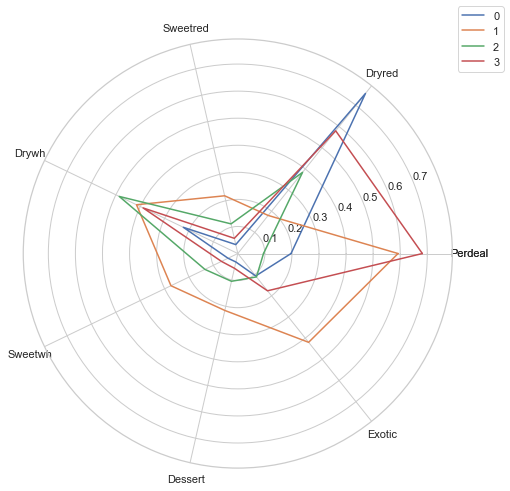

In [54]:
multiple_radar_plot(a,a.columns)

In [55]:
calculate_r2(kmeans_profile[behavior],kmeans_profile['Behavior'],'KMeans')

Cluster solution with R^2 of 0.5828


0.5827796864850122

#### Comparing Models

In [56]:
def metric_evaluation(df,label_name):
    from sklearn.metrics import davies_bouldin_score # the lower the better
    db = davies_bouldin_score(df.drop(columns=[f'{label_name}']),df[label_name])
    from sklearn.metrics import silhouette_score # the higher the better (closer to 1)
    ss = silhouette_score(df.drop(columns=[f'{label_name}']), df[label_name])
    from sklearn.metrics import calinski_harabasz_score # the higher the better
    ch = calinski_harabasz_score(df.drop(columns=[f'{label_name}']),df[label_name])

    return print('Davies-bouldin score :',np.round(db,4), '\nSilhoutte score :',np.round(ss,4),'\nCalinski-Harabasz score : ',np.round(ch,4))

print(f'{ii} perspective')
print(metric_evaluation(pd.concat([kmeans_profile[i],kmeans_profile[f'{ii}']],axis=1),f'{ii}'))
calculate_r2(kmeans_profile[i],kmeans_profile[f'{ii}'],'KMeans')
print('-'*125)

In [57]:
for i, ii in zip([value,behavior],['Value','Behavior']):
    print(f'{ii} perspective')
    print(metric_evaluation(pd.concat([kmeans_profile[i],kmeans_profile[f'{ii}']],axis=1),f'{ii}'))
    calculate_r2(kmeans_profile[i],kmeans_profile[f'{ii}'],'KMeans')
    print('-'*125)

Value perspective
Davies-bouldin score : 0.4351 
Silhoutte score : 0.704 
Calinski-Harabasz score :  47390.5012
None
Cluster solution with R^2 of 0.5415
-----------------------------------------------------------------------------------------------------------------------------
Behavior perspective
Davies-bouldin score : 0.5435 
Silhoutte score : 0.684 
Calinski-Harabasz score :  47175.515
None
Cluster solution with R^2 of 0.5828
-----------------------------------------------------------------------------------------------------------------------------


In [58]:
for i, ii in zip([value,behavior],['HC_Value','HC_Behavior']):
    print(f'{ii} perspective')
    print(metric_evaluation(pd.concat([hc_profile[i],hc_profile[f'{ii}']],axis=1),f'{ii}'))
    calculate_r2(hc_profile[i],hc_profile[f'{ii}'],'KMeans')
    print('-'*125)

HC_Value perspective
Davies-bouldin score : 0.4 
Silhoutte score : 0.7263 
Calinski-Harabasz score :  63419.1346
None
Cluster solution with R^2 of 0.6078
-----------------------------------------------------------------------------------------------------------------------------
HC_Behavior perspective
Davies-bouldin score : 0.5457 
Silhoutte score : 0.6435 
Calinski-Harabasz score :  35115.1413
None
Cluster solution with R^2 of 0.5349
-----------------------------------------------------------------------------------------------------------------------------


__Final Solution:__  
__Value Perspective:__ Hierarchical with 4 clusters    
__Behavior Perspective:__ K-Means with 4 clusters  

In [109]:
data_merge= data_modelling.copy()
data_merge['Value_Pers'] = hc_profile['HC_Value']
data_merge['Behavior_Pers'] = kmeans_profile['Behavior']
data_merge.head(5)

Dayswus       Age   Edu    Income      Freq   Recency  Monetary  \
Custid                                                                     
5325    0.147143  0.616667  1.00  0.524183  0.345455  0.032787  0.269206   
3956    0.701429  0.950000  0.75  0.727922  0.636364  0.060109  0.606041   
3681    0.165714  0.000000  0.00  0.137673  0.054545  0.102004  0.010834   
2829    0.712857  0.400000  0.50  0.396148  0.018182  0.083789  0.010177   
8788    0.410000  0.483333  0.50  0.427083  0.018182  0.005464  0.009849   

             LTV   Perdeal    Dryred  ...   Sweetwh   Dessert    Exotic  \
Custid                                ...                                 
5325    0.316404  0.072165  0.673469  ...  0.032258  0.012987  0.010417   
3956    0.364144  0.020619  0.489796  ...  0.016129  0.038961  0.000000   
3681    0.086846  0.907216  0.030612  ...  0.516129  0.272727  0.500000   
2829    0.087354  0.721649  0.867347  ...  0.016129  0.012987  0.572917   
8788    0.092433  0.360825  0.857143  ...  0.032258  0.012987  0.291667   

        WebPurchase  WebVisit  Mont_income  Avg_Purchase  Neg_LTV  Value_Pers  \
Custid                                                                          
5325       0.380952       0.5     0.524184      0.727835    False           2   
3956       0.190476       0.4     0.727922      0.936907    False           3   
3681       0.666667       0.8     0.137674      0.077320     True           0   
2829       0.654762       0.7     0.396148      0.257732     True           1   
8788       0.702381       0.6     0.427083      0.247423    False           0   

        Behavior_Pers  
Custid                 
5325                0  
3956                2  
3681                1  
2829                3  
8788                0  

[5 rows x 22 columns]

#### Cluster Naming

__Value Perspective:__
- Cluster 1: Characterized by customer with highest recency (don't buy in a long time) and low LTV - One_Timers   
- Cluster 2: Characterized by "old' customers (in terms of longevity with the company) and low LTV - Senior_Customers
- Cluster 3: Characterized by customers with average LTV and high high income (they can spend more money in the future) - Prospect_Customers
- Cluster 4: Characterized by high valuable customers with high income that are loyals to the store (small recency and high Dayswus) High_Valuable

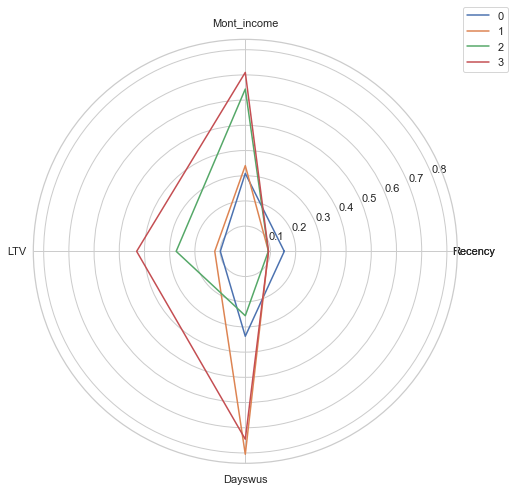

In [60]:
multiple_radar_plot(data_merge.groupby('Value_Pers').mean()[value],data_merge[value].columns)

__Behavior Perspective:__
- Cluster 1: Characterized by customers that buy mainly Dryred wines - DryRed   
- Cluster 2: Characterized by customer who mainly enjoy Dessert, Exotic, Sweet white and red Wine with discount - Open_Minded
- Cluster 3: Characterized by customers who mainly buy Dry White wine without discount- DryWhiteWine
- Cluster 4: Characterized by customer who mainly enjoy dry wines on discount - Discount_Red

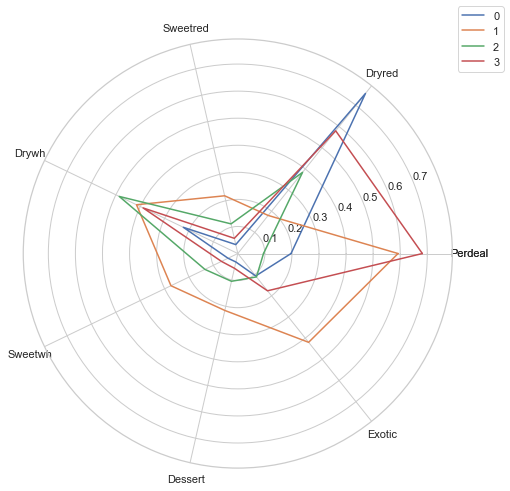

In [61]:
multiple_radar_plot(data_merge.groupby('Behavior_Pers').mean()[behavior],data_merge[behavior].columns)

#### Merge small clusters 

In [110]:
def merge_perspectives (data, to_merge, df_centroids, label1, label2):
    from sklearn.metrics import pairwise_distances
    euclidean = pairwise_distances(df_centroids)
    df_dists = pd.DataFrame(
        euclidean, columns=df_centroids.index, index=df_centroids.index
    )

    # Merging each low frequency clustering (source) to the closest cluster (target)
    source_target = {}
    for clus in to_merge:
        if clus not in source_target.values():
            source_target[clus] = df_dists.loc[clus].sort_values().index[1]

    source_target
    
    df_ = data.copy()

    # Changing the behavior_labels and product_labels based on source_target
    for source, target in source_target.items():
        mask = (df_[f'{label1}']==source[0]) & (df_[f'{label2}']==source[1])
        df_.loc[mask, f'{label1}'] = target[0]
        df_.loc[mask, f'{label2}'] = target[1]

    # New contigency table
    print(df_.groupby([f'{label2}', f'{label1}'])\
        .size()\
        .to_frame()\
        .reset_index()\
        .pivot(f'{label1}', f'{label2}', 0))
    
    return(df_)

In [111]:
crosstable1 = pd.crosstab(index= data_merge['Value_Pers'].values, columns=data_merge['Behavior_Pers'].values, )
crosstable1

col_0    0    1     2     3
row_0                      
0      761  957   456  1308
1      701  596   419   867
2      999   15  1399    66
3      442    1  1013     0

In [112]:
centroids= data_merge.groupby(['Value_Pers','Behavior_Pers']).mean()
cluster_df = merge_perspectives(data_merge, [(1,2),(2,1),(2,3),(3,1),(0,2),(3,0)],centroids, 'Value_Pers', 'Behavior_Pers' )

Behavior_Pers       0      1       2       3
Value_Pers                                  
0               761.0  957.0   471.0  1374.0
1              1120.0  596.0     NaN   867.0
2               999.0    NaN  1399.0     NaN
3                 NaN    NaN  1456.0     NaN


In [113]:
crosstable1 = pd.crosstab(index= cluster_df['Value_Pers'].values, columns=cluster_df['Behavior_Pers'].values, )
crosstable1

col_0     0    1     2     3
row_0                       
0       761  957   471  1374
1      1120  596     0   867
2       999    0  1399     0
3         0    0  1456     0

#### Cluster Naming 

In [114]:
naming = cluster_df.copy()
for i , ii in zip([0,1,2,3], ['One_timers','Senior','Prospect','High_valuable']):
    naming.loc[naming['Value_Pers']==i,'Value_Pers']= ii
    
for i , ii in zip([0,1,2,3], ['DryRed_Customers','OpenMinded_Customers','DryWhiteWine_Customers','DiscountRed_Customers']):
    naming.loc[naming['Behavior_Pers']==i,'Behavior_Pers']= ii
    
naming['Full_Solution'] = naming['Value_Pers'] + naming['Behavior_Pers']

In [115]:
a = naming.groupby('Full_Solution').mean()
a.style.applymap(max_highlight)

In [116]:
naming.groupby('Full_Solution').count()['Age']

Full_Solution
High_valuableDryWhiteWine_Customers    1456
One_timersDiscountRed_Customers        1374
One_timersDryRed_Customers              761
One_timersDryWhiteWine_Customers        471
One_timersOpenMinded_Customers          957
ProspectDryRed_Customers                999
ProspectDryWhiteWine_Customers         1399
SeniorDiscountRed_Customers             867
SeniorDryRed_Customers                 1120
SeniorOpenMinded_Customers              596
Name: Age, dtype: int64

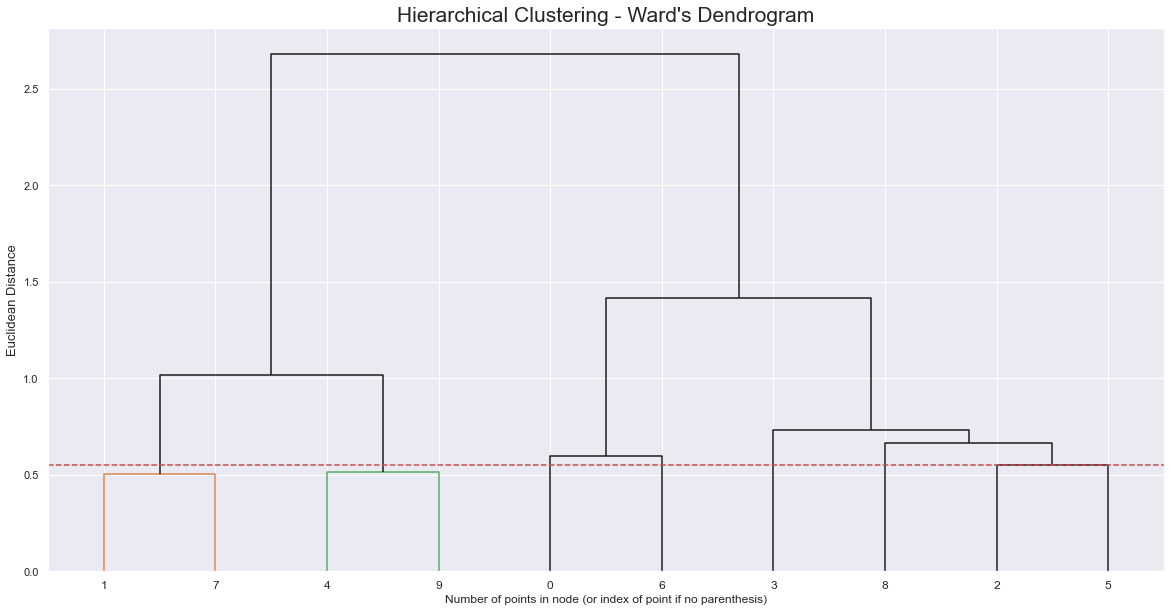

In [69]:
hc_cluster = AgglomerativeClustering(linkage='ward',affinity='euclidean',n_clusters=None,distance_threshold=0)
hc_cluster.fit(a)
dendogram(hc_cluster,0.55,'Ward','Euclidean')

In [70]:
#Cluster 2 and 8 comparison - merge
a.T[['One_timersDiscountRed_Customers','SeniorDiscountRed_Customers']].T

Dayswus       Age       Edu    Income  \
Full_Solution                                                             
One_timersDiscountRed_Customers  0.323445  0.316618  0.636645  0.315308   
SeniorDiscountRed_Customers      0.794037  0.308247  0.642878  0.311130   

                                     Freq   Recency  Monetary       LTV  \
Full_Solution                                                             
One_timersDiscountRed_Customers  0.059124  0.161579  0.030506  0.086499   
SeniorDiscountRed_Customers      0.100807  0.091528  0.059912  0.081545   

                                  Perdeal    Dryred  Sweetred     Drywh  \
Full_Solution                                                             
One_timersDiscountRed_Customers  0.678657  0.578105  0.058137  0.390142   
SeniorDiscountRed_Customers      0.686833  0.582974  0.056947  0.385789   

                                  Sweetwh   Dessert    Exotic  WebPurchase  \
Full_Solution                                                                
One_timersDiscountRed_Customers  0.067063  0.056201  0.172413     0.600749   
SeniorDiscountRed_Customers      0.066823  0.055378  0.181925     0.600758   

                                 WebVisit  Mont_income  Avg_Purchase   Neg_LTV  
Full_Solution                                                                   
One_timersDiscountRed_Customers  0.614993     0.315309      0.264362  0.801310  
SeniorDiscountRed_Customers      0.726528     0.311131      0.369815  0.846597

In [71]:
#Cluster 5 and 10 comparison - merge
a.T[['One_timersOpenMinded_Customers','SeniorOpenMinded_Customers']].T

Dayswus       Age       Edu    Income  \
Full_Solution                                                            
One_timersOpenMinded_Customers  0.315122  0.124643  0.384927  0.198079   
SeniorOpenMinded_Customers      0.794470  0.116946  0.362416  0.191385   

                                    Freq   Recency  Monetary       LTV  \
Full_Solution                                                            
One_timersOpenMinded_Customers  0.038567  0.184079  0.014874  0.090097   
SeniorOpenMinded_Customers      0.067541  0.095271  0.034393  0.091276   

                                 Perdeal    Dryred  Sweetred     Drywh  \
Full_Solution                                                            
One_timersOpenMinded_Customers  0.593511  0.181488  0.213138  0.423999   
SeniorOpenMinded_Customers      0.597194  0.176380  0.229508  0.403443   

                                 Sweetwh   Dessert    Exotic  WebPurchase  \
Full_Solution                                                               
One_timersOpenMinded_Customers  0.271295  0.213478  0.418299     0.638167   
SeniorOpenMinded_Customers      0.280093  0.216508  0.422994     0.629035   

                                WebVisit  Mont_income  Avg_Purchase   Neg_LTV  
Full_Solution                                                                  
One_timersOpenMinded_Customers  0.630617     0.198079      0.179705  0.570533  
SeniorOpenMinded_Customers      0.733557     0.191385      0.273973  0.642617

In [117]:
naming_2 = naming.copy()
naming_2.loc[naming_2['Full_Solution']=='One_timersDiscountRed_Customers','Full_Solution'] = 'SeniorDiscountRed_Customers'
naming_2.loc[naming_2['Full_Solution']=='One_timersOpenMinded_Customers','Full_Solution'] = 'SeniorOpenMinded_Customers'

In [118]:
naming_2.groupby('Full_Solution').count()['Age']

Full_Solution
High_valuableDryWhiteWine_Customers    1456
One_timersDryRed_Customers              761
One_timersDryWhiteWine_Customers        471
ProspectDryRed_Customers                999
ProspectDryWhiteWine_Customers         1399
SeniorDiscountRed_Customers            2241
SeniorDryRed_Customers                 1120
SeniorOpenMinded_Customers             1553
Name: Age, dtype: int64

In [119]:
def get_ss_variables(df):
    """Get the SS for each variable
    """
    ss_vars = df.var() * (df.count() - 1)
    return ss_vars

def r2_variables(df, labels):
    """Get the R² for each variable
    """
    sst_vars = get_ss_variables(df)
    ssw_vars = np.sum(df.groupby(labels).apply(get_ss_variables))
    return 1 - ssw_vars/sst_vars


In [132]:
sum(var_explained)

nan

In [130]:
len(var_explained.index)

12

In [142]:
var_explained.values

array([0.43947986, 0.32825601, 0.58658656, 0.25159927, 0.38939928,
              nan, 0.7021714 , 0.76155839, 0.79900863, 0.03569471,
       0.32469432, 0.34593091])

In [141]:
np.sum(var_explained.values())

TypeError: 'numpy.ndarray' object is not callable

In [143]:
var_explained = r2_variables(naming_2[value+behavior+['Full_Solution']],'Full_Solution').drop(index=['Full_Solution'])
tot_var = len(var_explained.index)
print(var_explained)
print('-'*125)
print(f'This analysis explained {np.sum(var_explained.values) / tot_var} of the variables used.')

Dayswus        0.439480
Dessert        0.328256
Dryred         0.586587
Drywh          0.251599
Exotic         0.389399
LTV            0.702171
Mont_income    0.761558
Perdeal        0.799009
Recency        0.035695
Sweetred       0.324694
Sweetwh        0.345931
dtype: float64
-----------------------------------------------------------------------------------------------------------------------------
This analysis explained 0.45130721362216125 of the variables used.


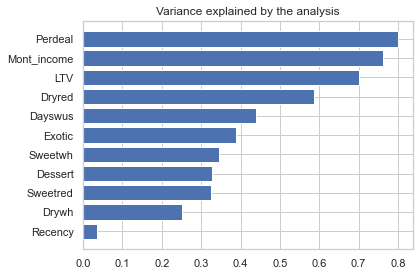

In [144]:
var_sorted = var_explained.sort_values(ascending=True).copy()
plt.barh(width=var_sorted.values, y = var_sorted.index)
plt.title('Variance explained by the analysis')
plt.tight_layout()
plt.savefig('Variance_explained.png')

High_valuableDryWhiteWine_Customers --> Premium Customers (they like Dries) - 1st  
One_timersDryRed_Customers --> Weak_DryRed Customers - 5th  
One_timersDryWhiteWine_Customers --> Sporadic Customers (no meaningfull behavior) - 6th  
ProspectDryRed_Customers --> Strong_DryRed Customers - 3rd  
ProspectDryWhiteWine_Customers --> Gold Customers (they like White Dries) - 2nd  
SeniorDiscountRed_Customers -- > Least_Profitable (they buy a lot on discount and buy mainly dry wines) - 8th  
SeniorDryRed_Customers --> Loyal (they are with the store since the beggining and never left) - 4th  
SeniorOpenMinded_Customers --> Weak_Versatille (they buy almost every kind of product, however mainly on discount) - 7th  

Rank sorted by LTV

In [74]:
a = naming_2.groupby('Full_Solution').mean()
a.style.applymap(max_highlight)

In [75]:
old_names = ['High_valuableDryWhiteWine_Customers', 'One_timersDryRed_Customers',
       'One_timersDryWhiteWine_Customers', 'ProspectDryRed_Customers',
       'ProspectDryWhiteWine_Customers', 'SeniorDiscountRed_Customers',
       'SeniorDryRed_Customers', 'SeniorOpenMinded_Customers']
new_names = ['Premium','Weak_DryRed','Sporadic','Strong_DryRed','Gold','Least_Profitable','Loyal','Weak_Versatille']
for i, ii in zip(old_names,new_names):    
    naming_2.loc[naming_2['Full_Solution']==i,'Full_Solution'] = ii
    
naming_2.drop(columns=['Value_Pers','Behavior_Pers'],inplace=True)

#### Cluster Visualization

In [76]:
def categorical_profile (data, labels):
    data1 = data.drop(f'{labels}',axis=1).copy()
    from math import ceil
    metric_features = data.select_dtypes(include=np.number).set_index(data.index).columns
    sns.set()
    fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(60, 60))
    
    
    box1 = data.copy()
    box1['Cons'] = 1
    for ax, i in zip(axes.flatten(), metric_features):
        a = sns.boxplot(y = box1[f'{labels}'] ,x=box1[i],ax=ax)
        
    #
    title = f'{labels} - Bopxlot Distribution'
    plt.suptitle(title,fontsize=20)
    #plt.tight_layout()
    plt.show()
    
    
#     sns.set()
#     fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(60, 60))
#     for ax, i in zip(axes.flatten(), metric_features):
#         sns.histplot(data= data ,x=data[i], hue = data[f'{labels}'],ax=ax,
#                      palette='colorblind',legend=False)
#     plt.legend(labels = data[labels].unique(),bbox_to_anchor=(1.05, 1), borderaxespad=0.)
#     title = f'{labels} - Histogram Distribution'
#     plt.suptitle(title,fontsize=20)
#     plt.show()


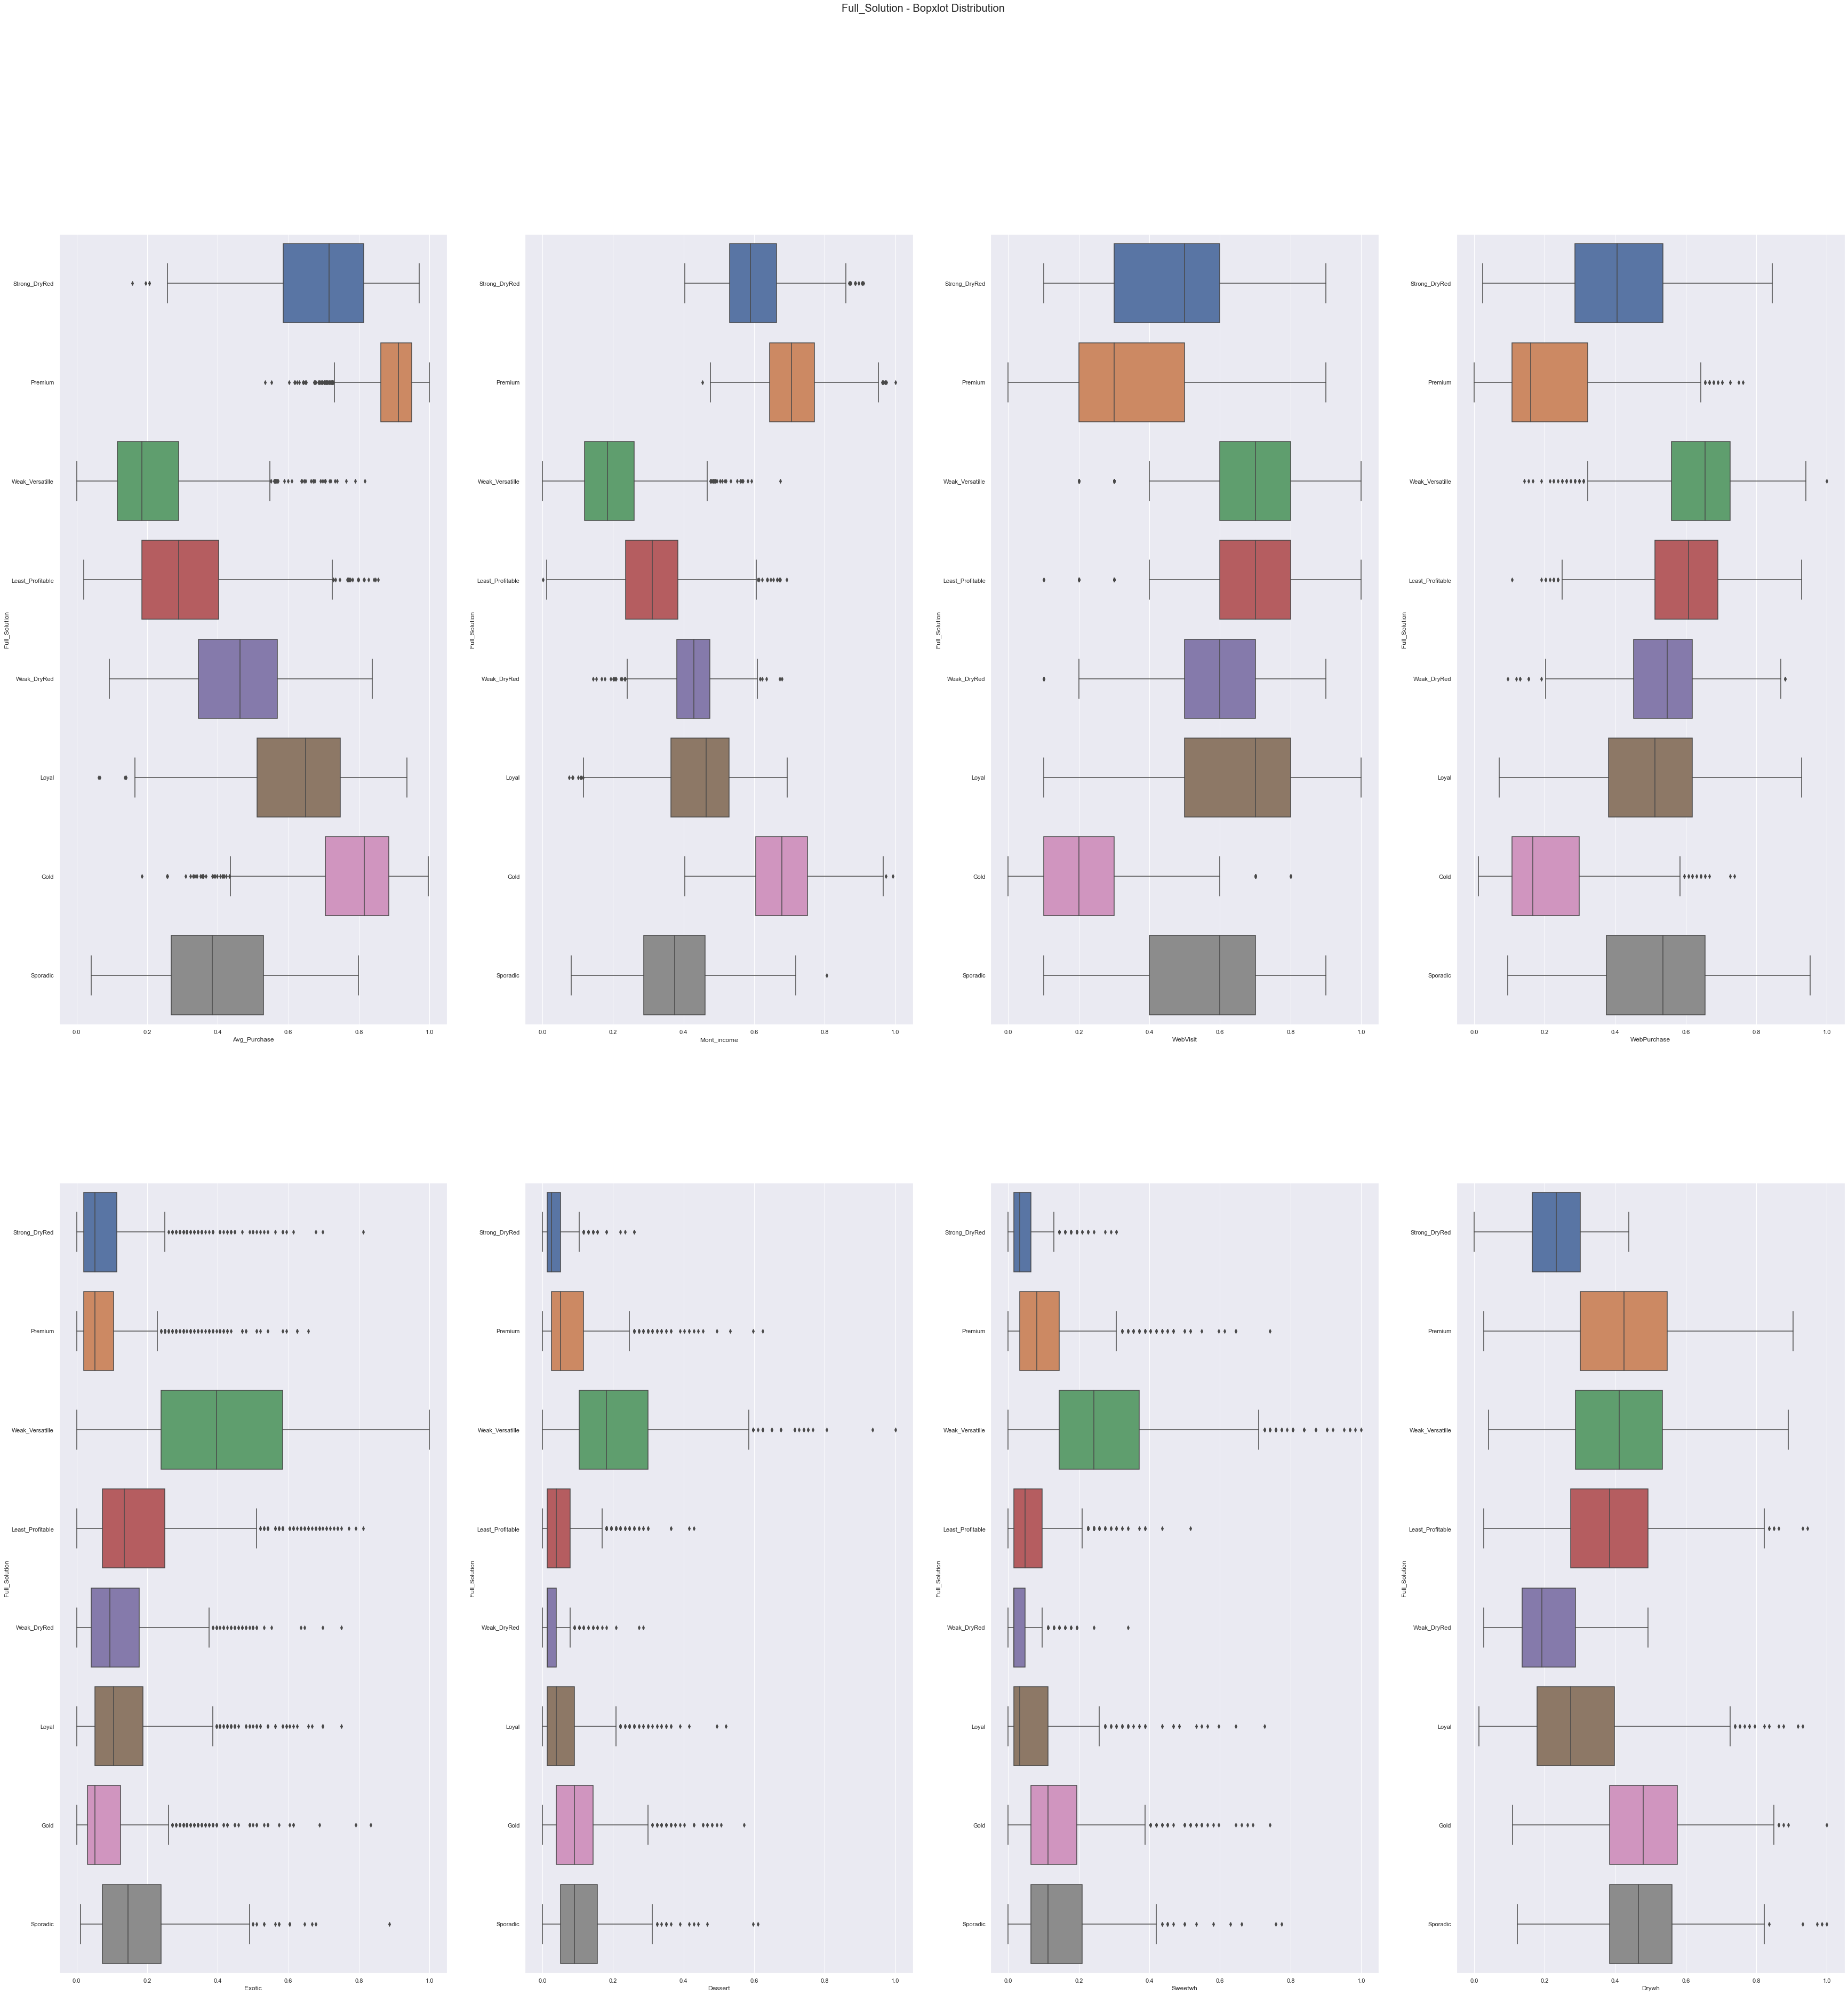

In [77]:
categorical_profile(naming_2.iloc[:,:int(naming_2.shape[1]/2):-1],'Full_Solution')

Boxplot - Comparison


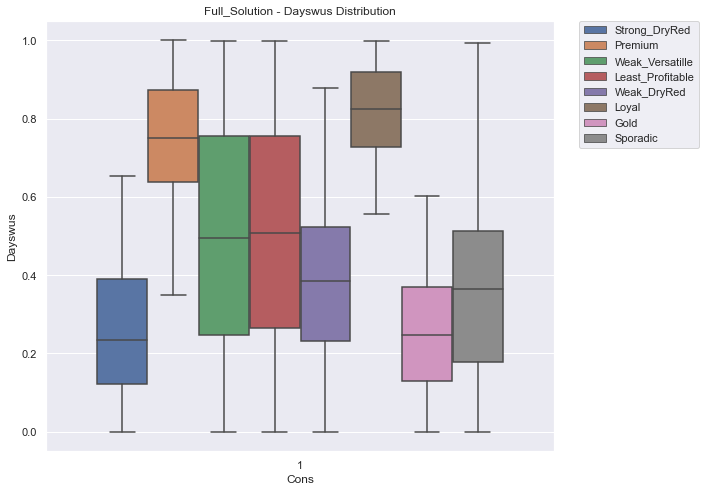

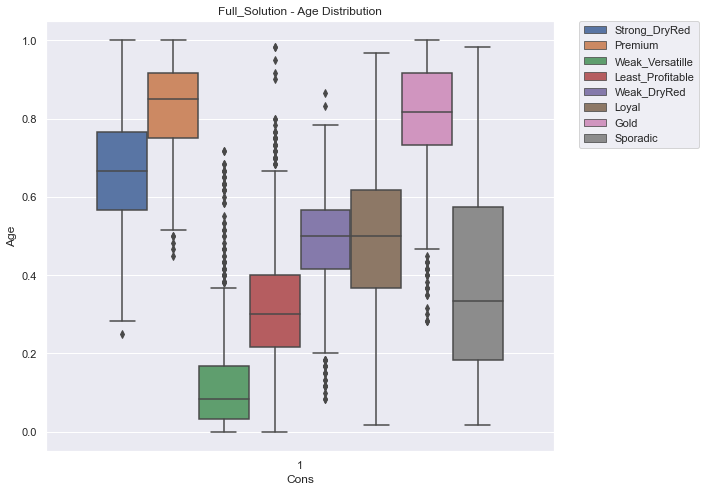

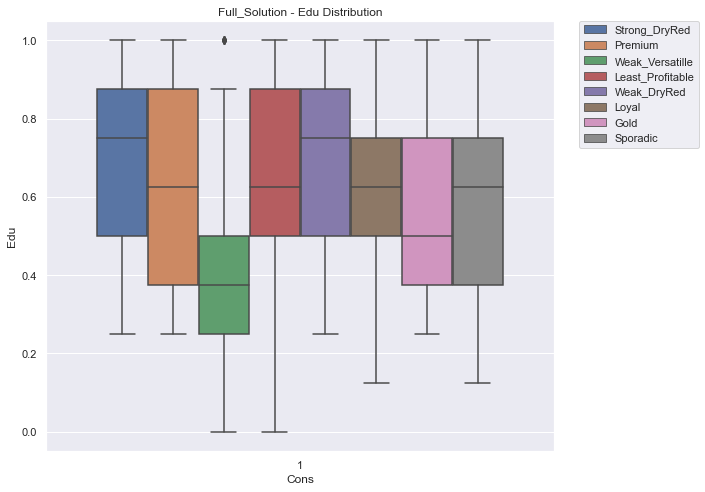

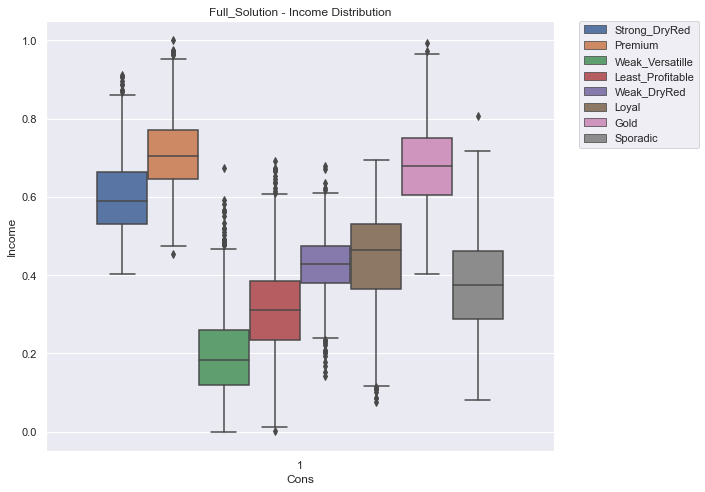

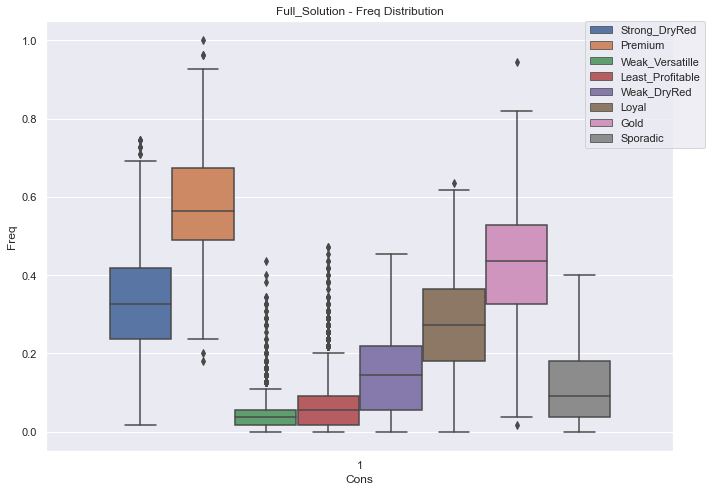

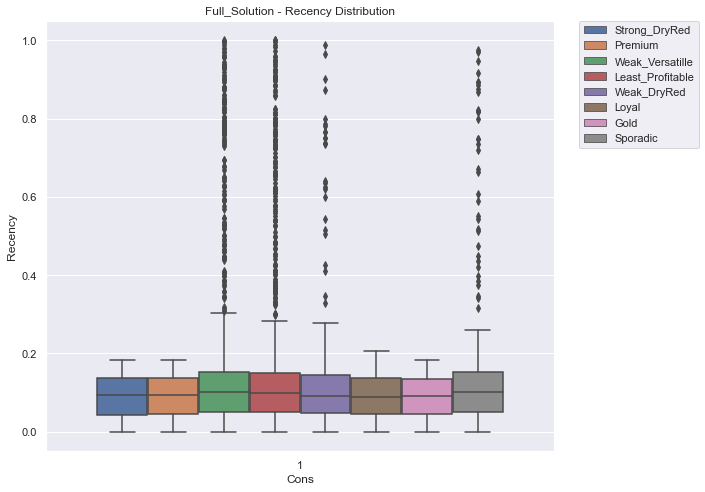

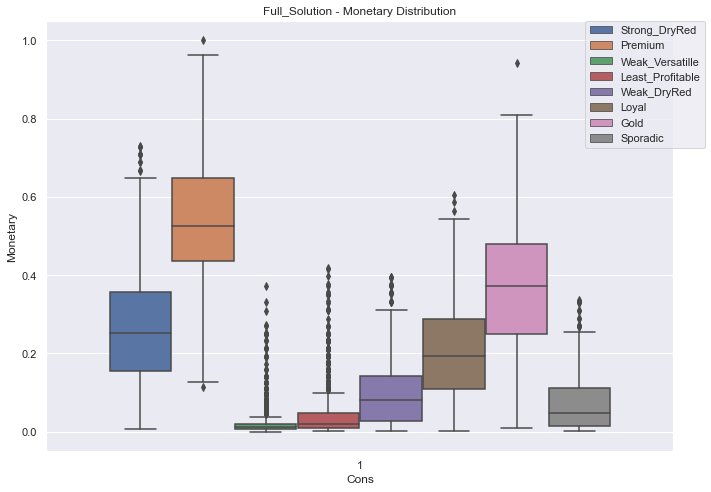

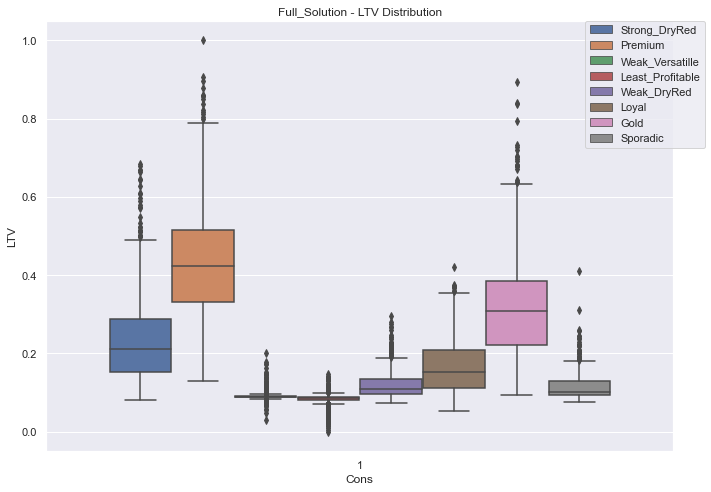

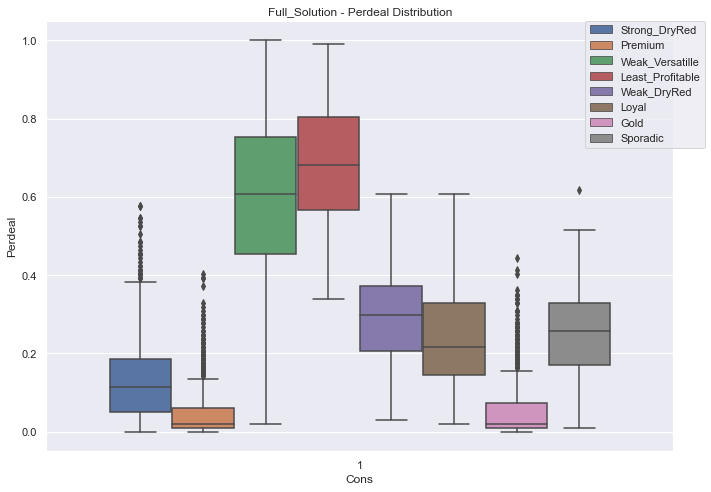

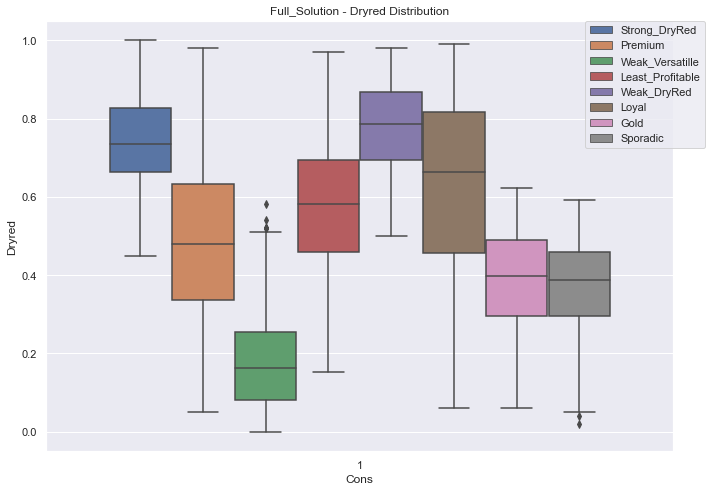

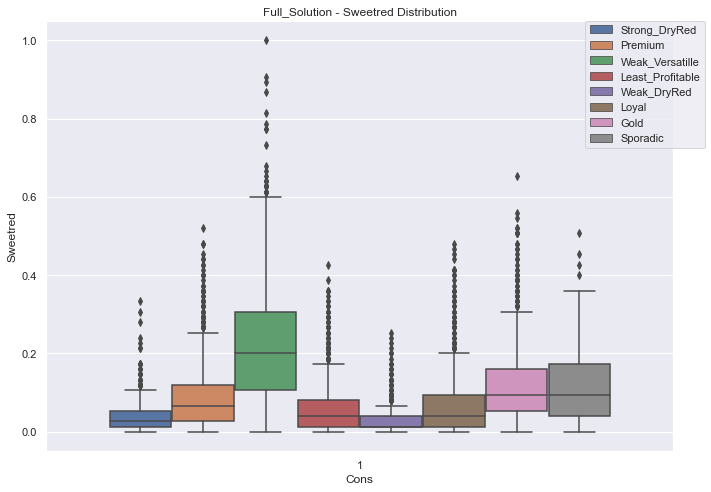

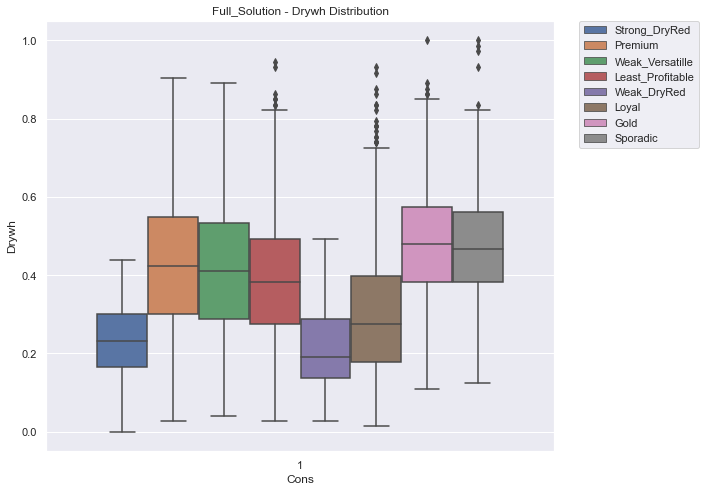

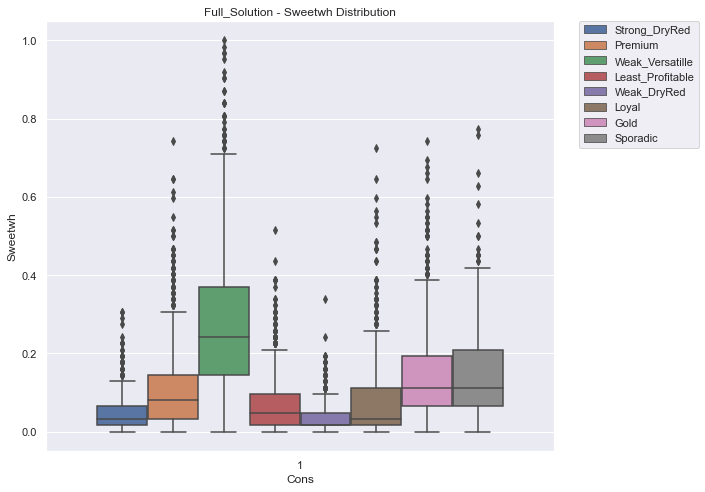

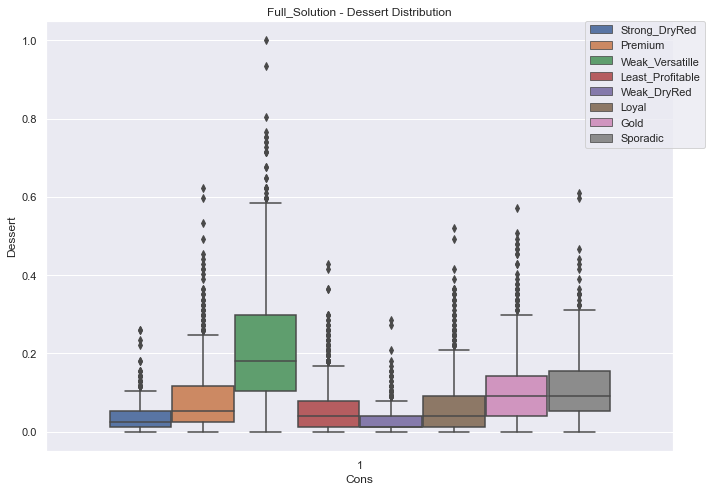

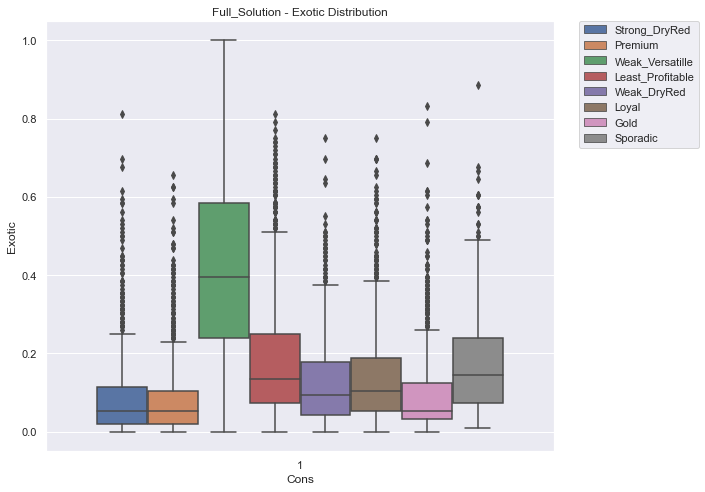

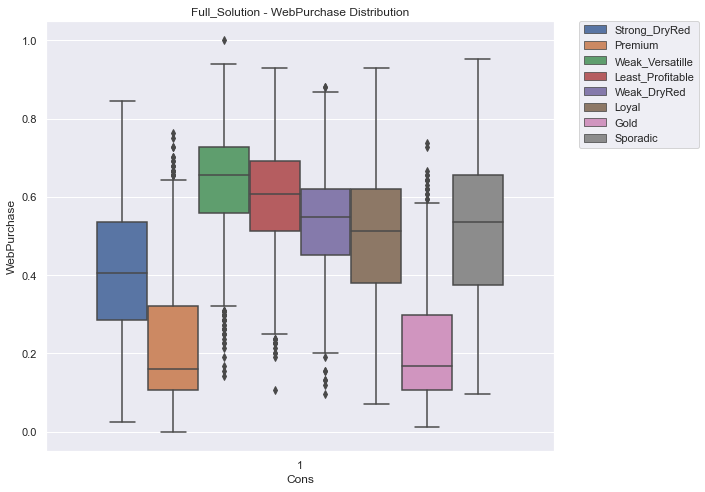

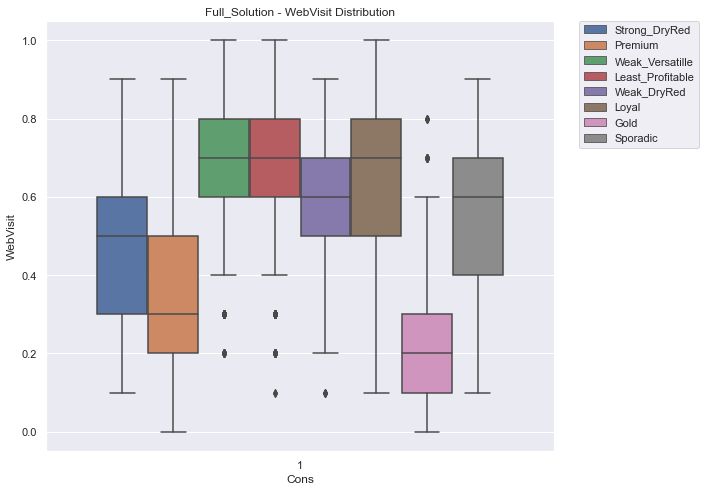

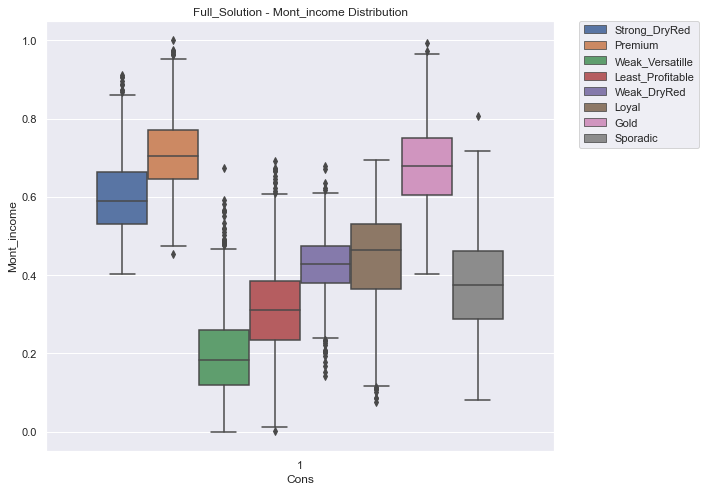

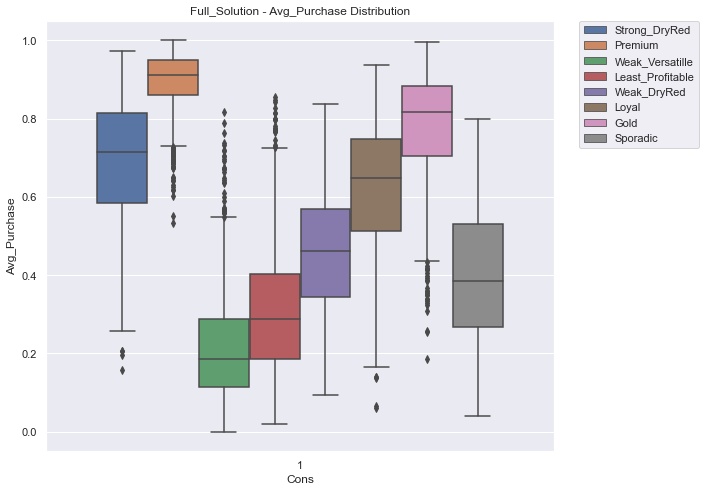

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 720x504 with 0 Axes>

In [78]:
def clustering_profile (data, labels):
    data1 = data.drop(f'{labels}',axis=1).copy()
    
    print('Boxplot - Comparison')
    box1 = data.copy()
    box1['Cons'] = 1
    for i in data1.columns:
        plt.figure(figsize=(10,7))
        sns.boxplot(data= box1,x=box1['Cons'] ,y=box1[i], hue = box1[f'{labels}'])
        plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        plt.title(f'{labels} - {i} Distribution')
        plt.tight_layout()
        #plt.savefig(f'{labels} - {i} Boxplot Distribution.png',dpi=150)
        plt.show()
    
    print('Histograms - Comparison')
    for i in data1.columns:
        plt.figure(figsize = (12,9))
        #fig, ax = plt.subplots(figsize = (12,9))
        
        sns.histplot(data= data ,x=data[i], hue = data[f'{labels}'],
                     palette='colorblind' )
        plt.title(f'{labels} - {i}  Distribution')
        #plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        plt.tight_layout()
        #plt.savefig(f'{labels} - {i} Histogram Distribution.png',dpi=150)
        plt.show()
        
        

        plt.show()
        
clustering_profile(naming_2,'Full_Solution')

#### Value Radar

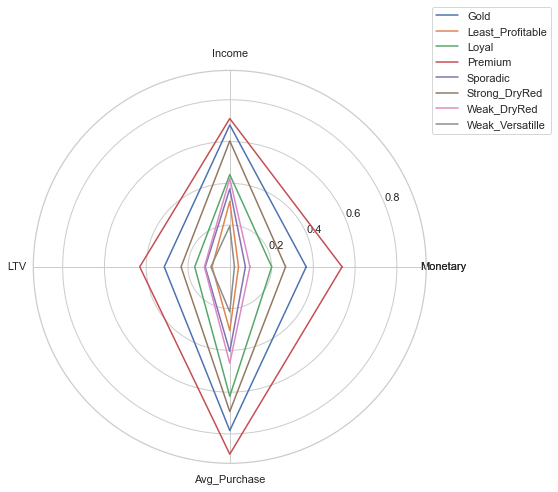

In [79]:
col1 = [ 'Monetary', 'Income','LTV','Avg_Purchase']
multiple_radar_plot(naming_2.groupby('Full_Solution').mean()[col1],col1)

#### Web/Discount Radar

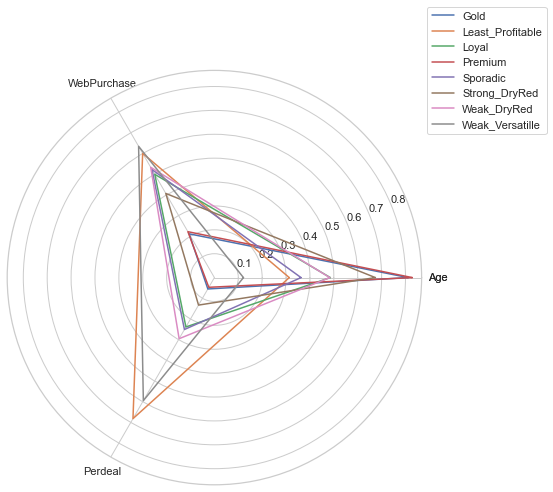

In [80]:
col1 = ['Age','WebPurchase','Perdeal']
multiple_radar_plot(naming_2.groupby('Full_Solution').mean()[col1],col1)

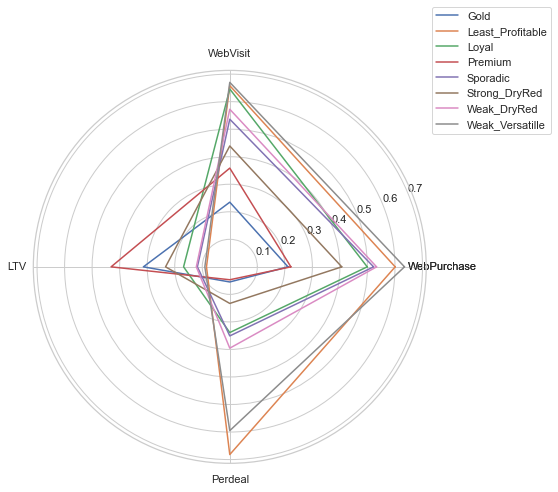

In [81]:
col1 = ['WebPurchase', 'WebVisit','LTV','Perdeal']
multiple_radar_plot(naming_2.groupby('Full_Solution').mean()[col1],col1)

#### Demographic Radar

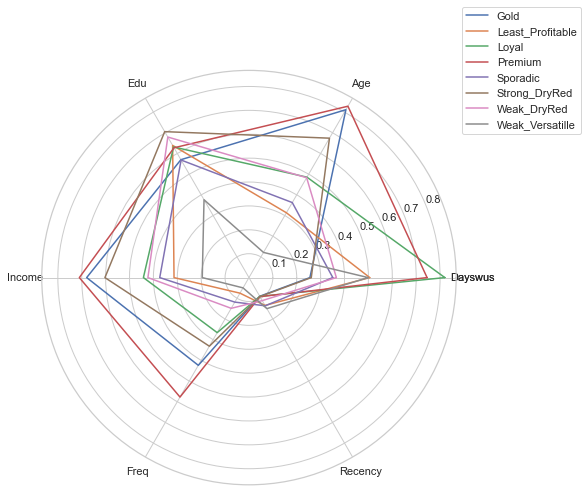

In [82]:
col1 = ['Dayswus', 'Age', 'Edu', 'Income', 'Freq', 'Recency']
multiple_radar_plot(naming_2.groupby('Full_Solution').mean()[col1],col1)

#### Behavior Radar

In [83]:
naming_2.columns

Index(['Dayswus', 'Age', 'Edu', 'Income', 'Freq', 'Recency', 'Monetary', 'LTV',
       'Perdeal', 'Dryred', 'Sweetred', 'Drywh', 'Sweetwh', 'Dessert',
       'Exotic', 'WebPurchase', 'WebVisit', 'Mont_income', 'Avg_Purchase',
       'Neg_LTV', 'Full_Solution'],
      dtype='object')

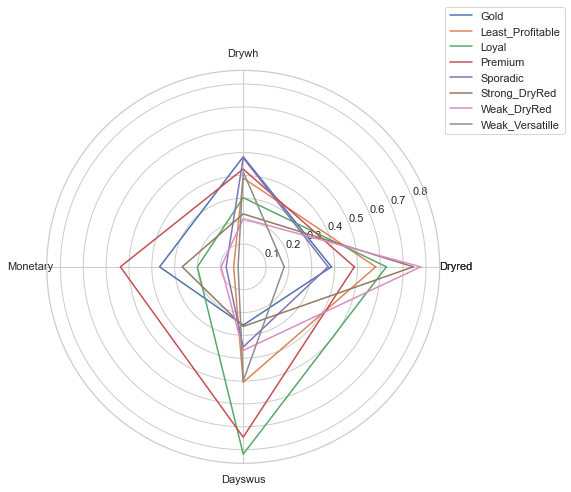

In [84]:
col1 = ['Dryred',  'Drywh','Monetary','Dayswus']
multiple_radar_plot(naming_2.groupby('Full_Solution').mean()[col1],col1)

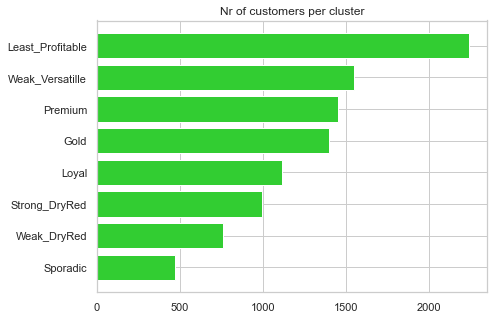

In [85]:
count = naming_2.groupby('Full_Solution').count()['Age'].sort_values(ascending=True)
sns.set_style("whitegrid")
plt.figure(figsize=(7,5))
plt.barh(y=count.index, width=count.values,color='limegreen')
plt.title('Nr of customers per cluster')
plt.show()

In [86]:
def cluster_barplot_profile (data,target):
    from math import ceil
    metric_features = data.select_dtypes(include=np.number).columns
    #data = pd.concat([data[metric_features], data[target]])
    # All Numeric Variables' Box Plots in one figure
    sns.set()

    # Prepare figure. Create individual axes where each box plot will be placed
    fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(30, 30))

    # Plot data
    # Iterate across axes objects and associate each box plot:
    for ax, feat,i in zip(axes.flatten(), metric_features,range(len(axes.flatten()))):
        sns.barplot(x=data.groupby(f'{target}').mean()[feat].index, y=data.groupby(f'{target}').mean()[feat].values 
                    ,color = 'royalblue',ax=ax)
        ax.axhline(y=data[feat].mean(),color='red')
        #plt.legend(fontisize=15)
        ax.tick_params(labelrotation=45)
        ax.title.set_text(f'{feat}')

    title = "Barplot Clustering Profile"

    plt.suptitle(title)

    plt.show()

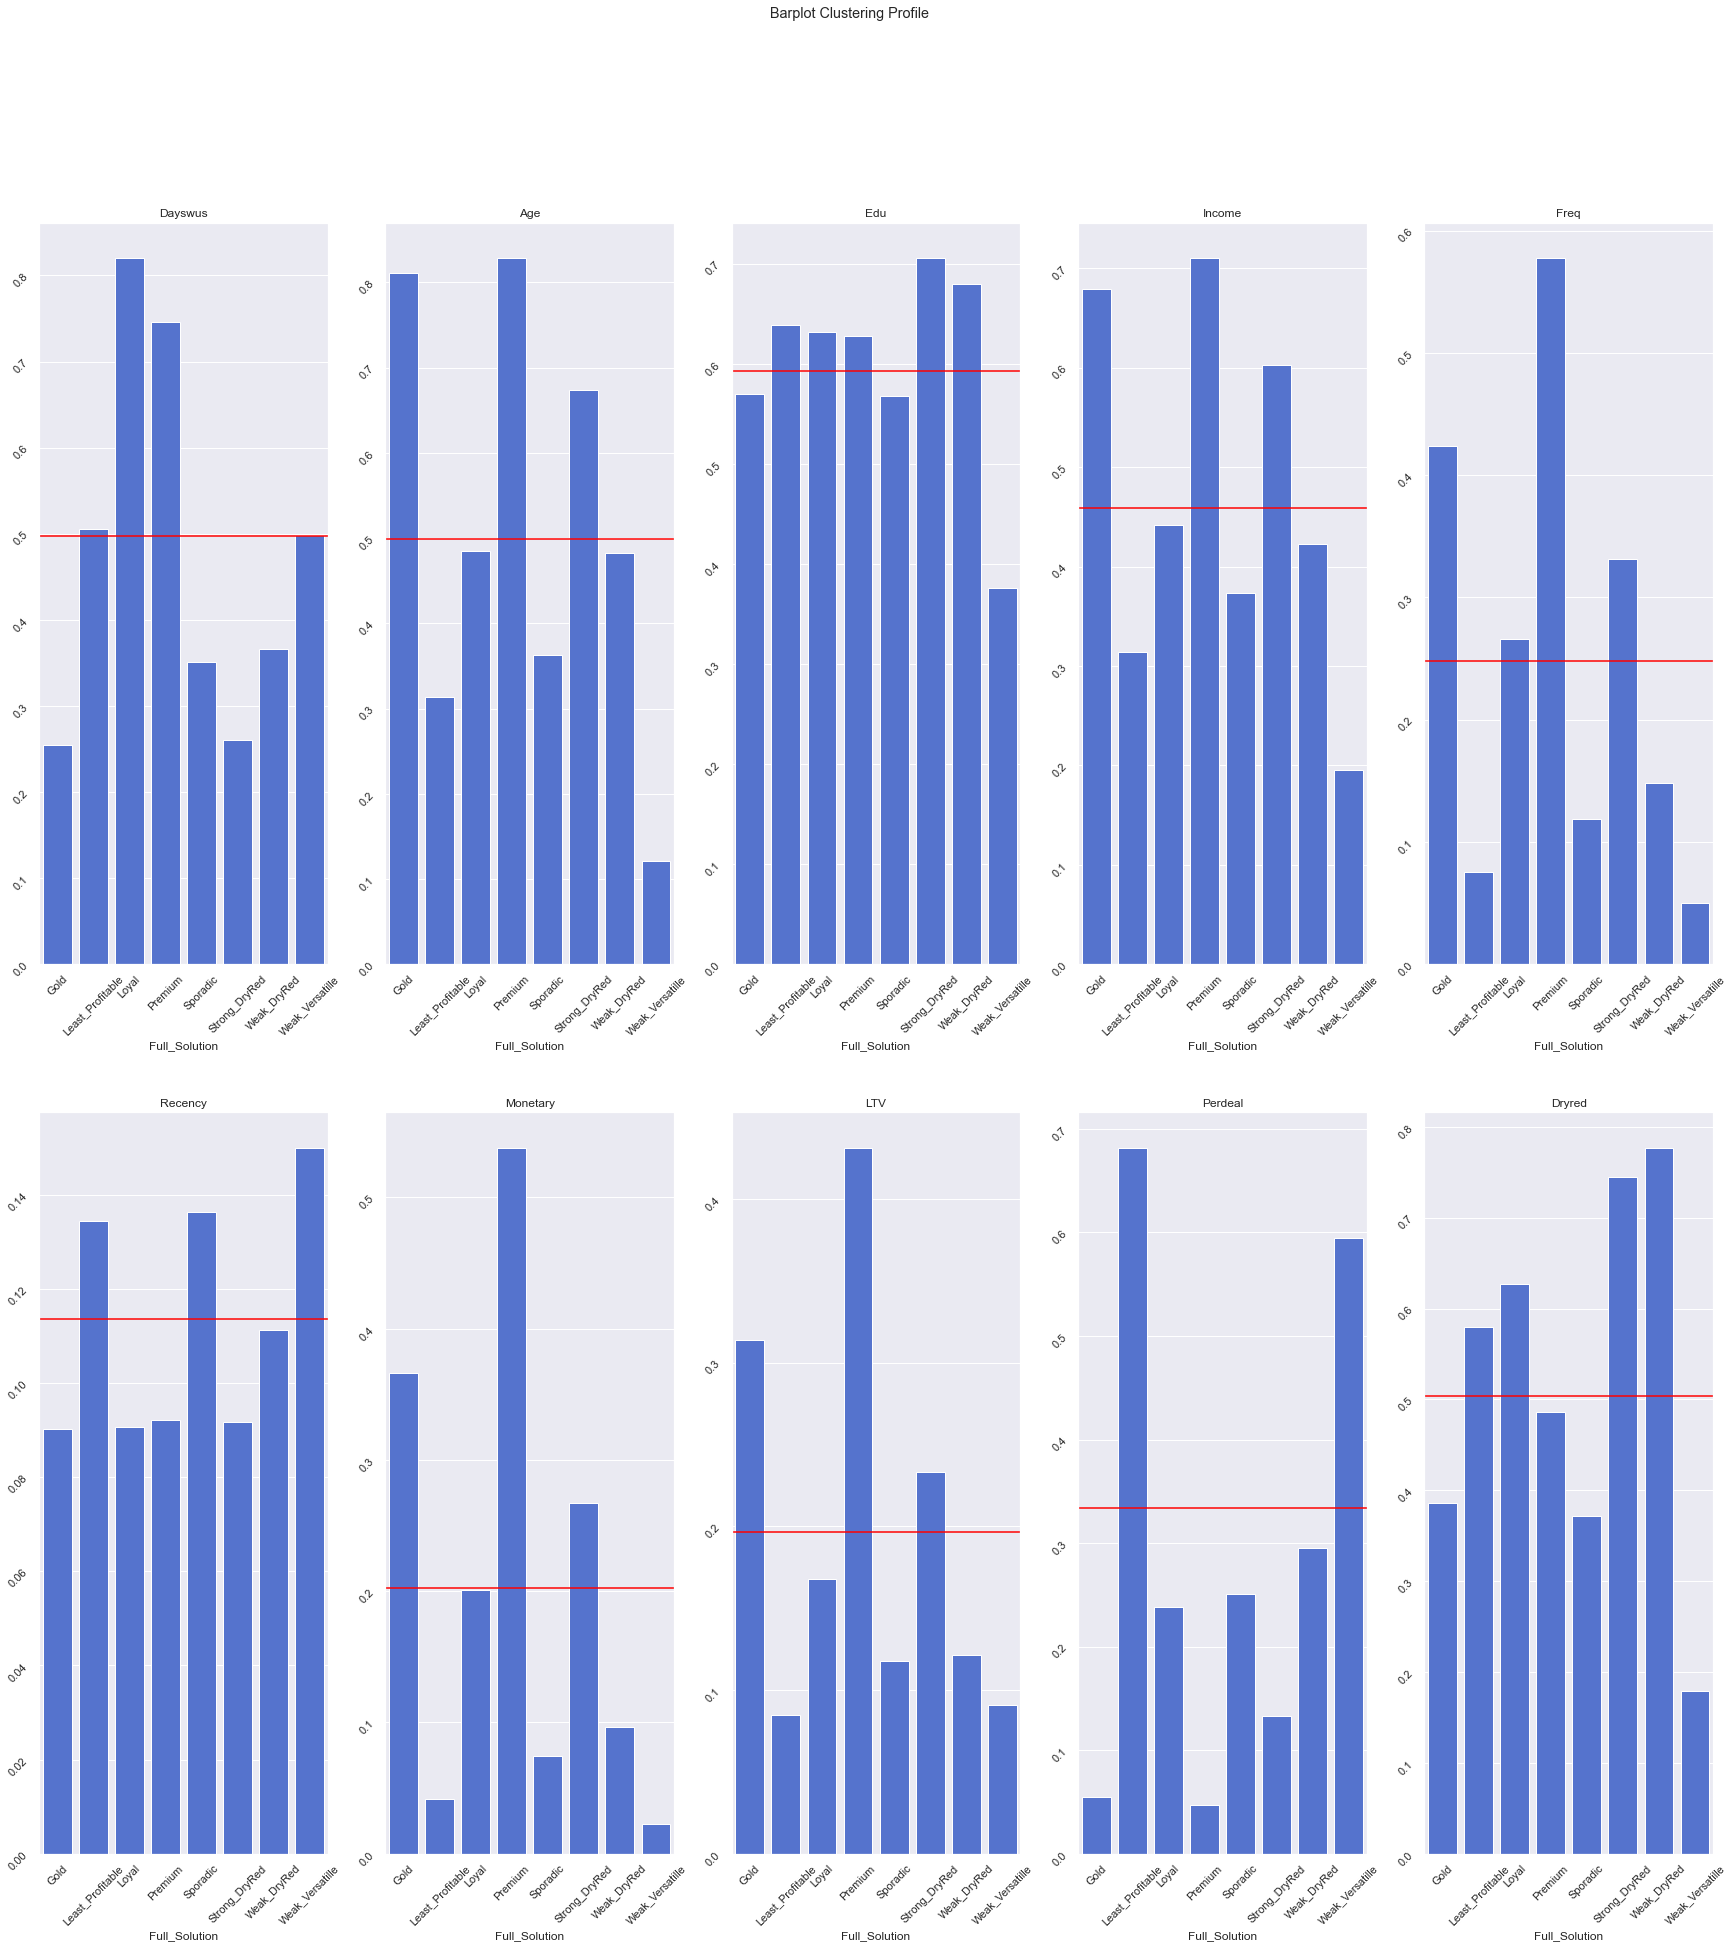

In [87]:
cluster_barplot_profile(pd.concat([naming_2.iloc[:,:int(naming_2.shape[1]/2)],naming_2.iloc[:,-1]],axis=1),'Full_Solution')

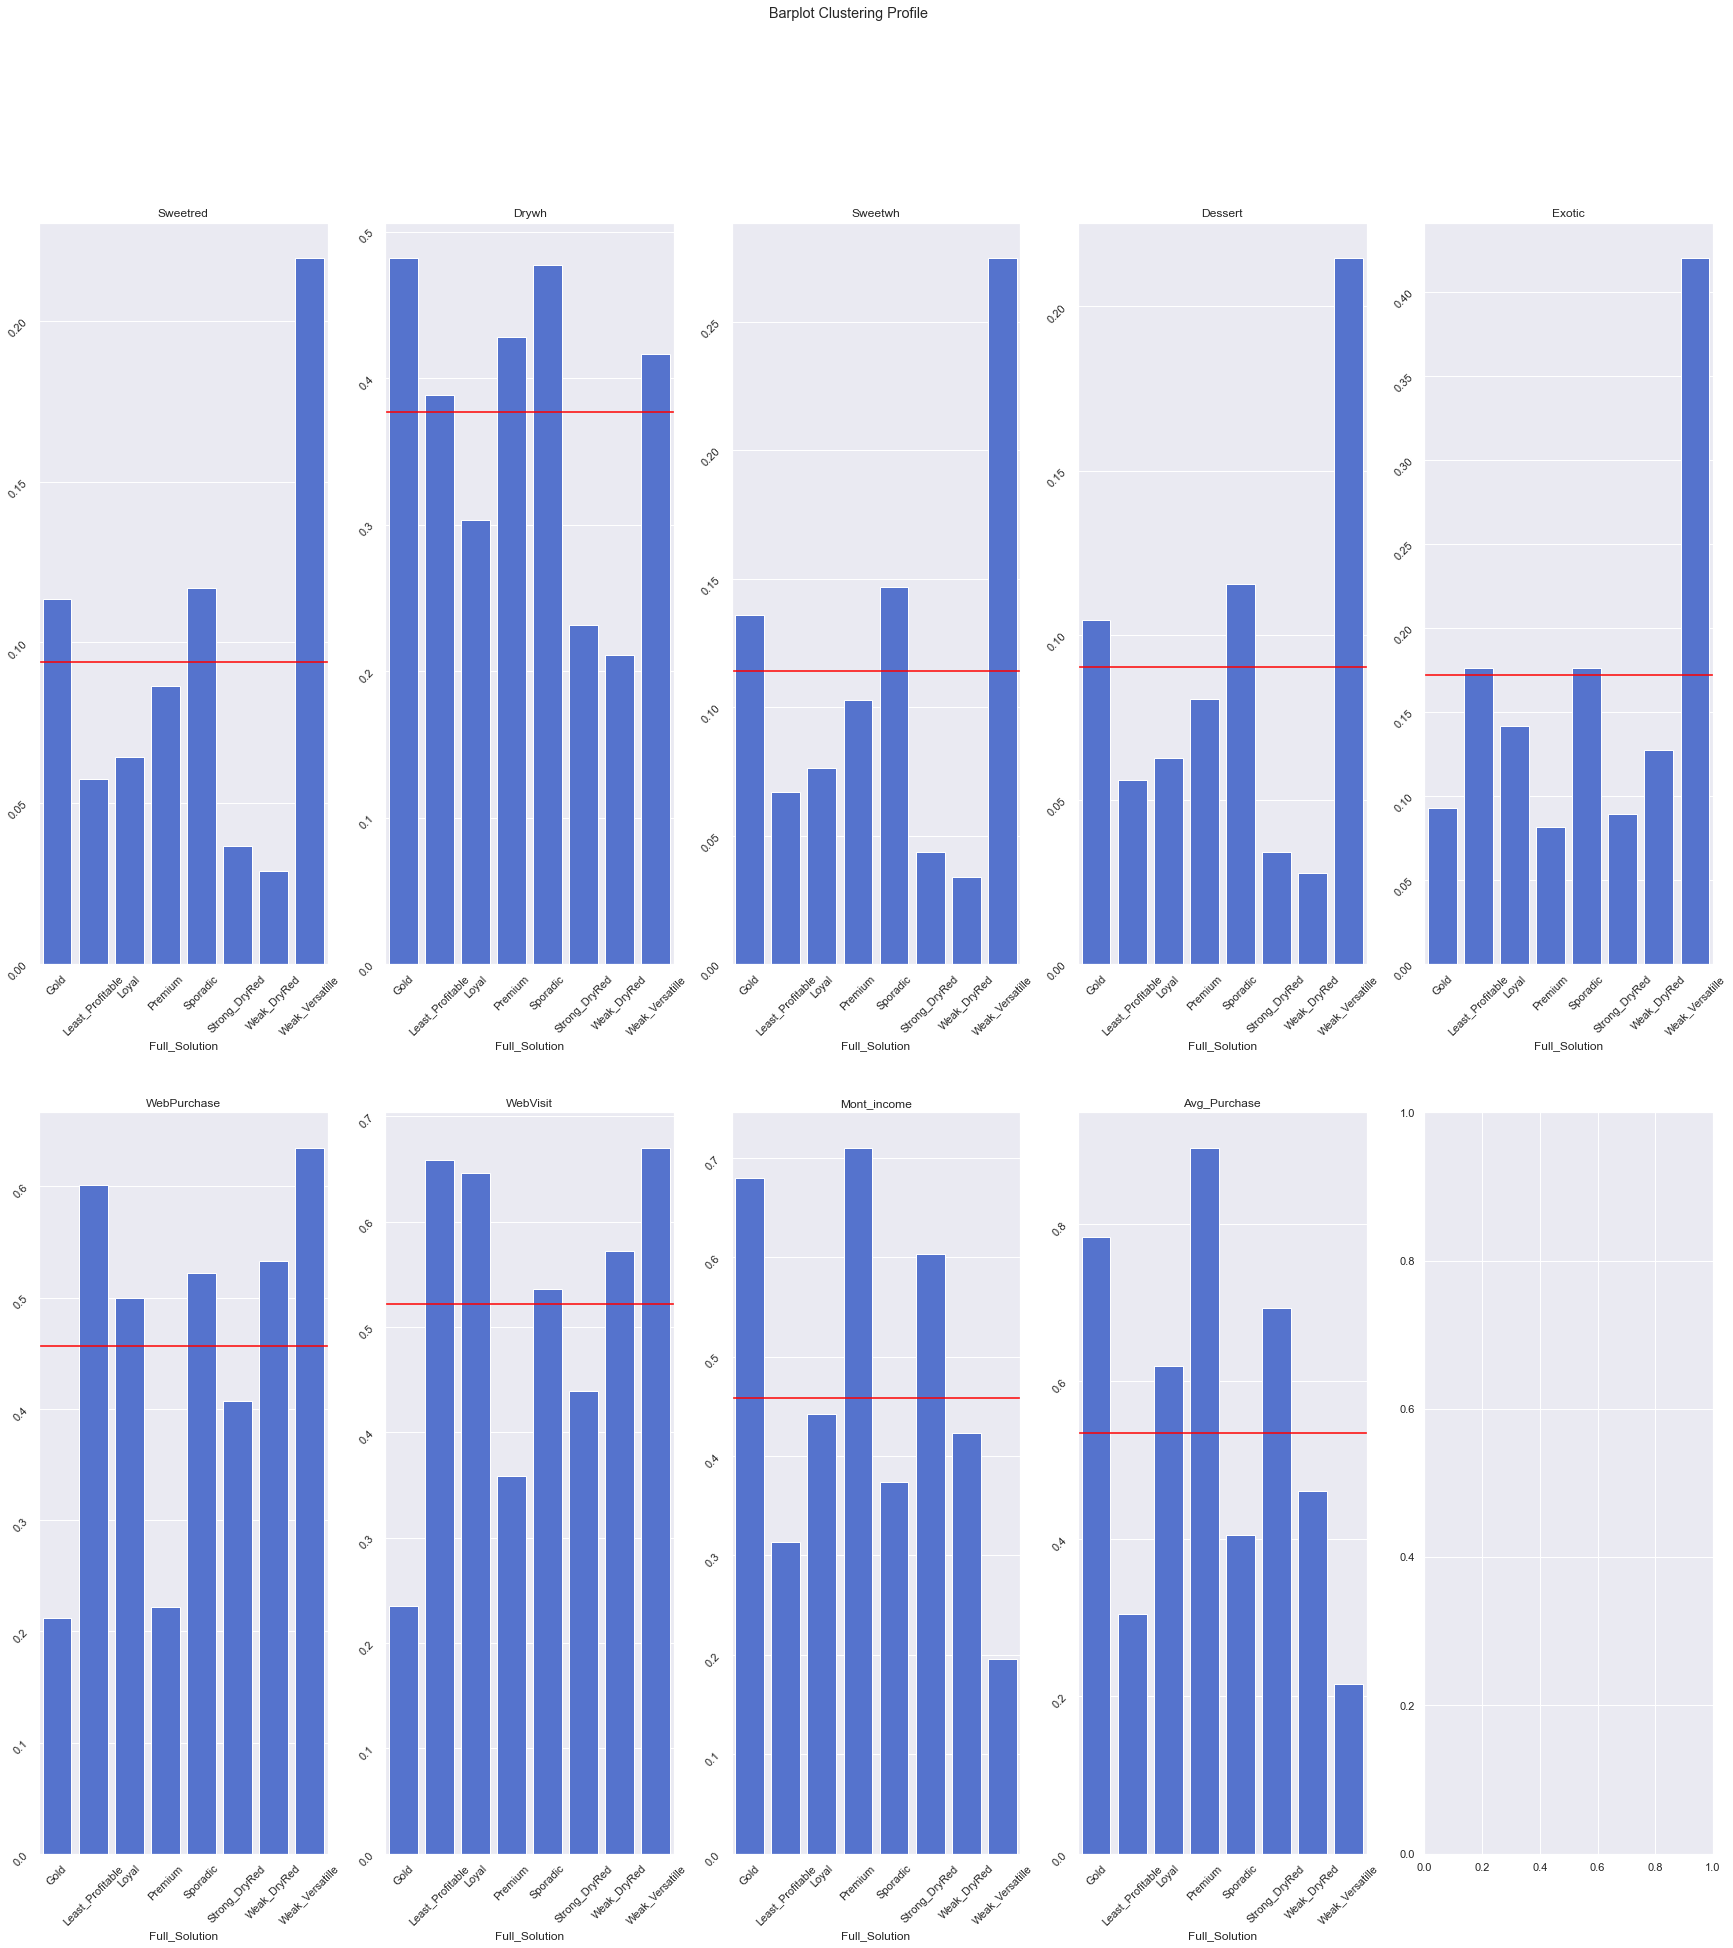

In [88]:
cluster_barplot_profile(pd.concat([naming_2.iloc[:,int(naming_2.shape[1]/2):-1],naming_2.iloc[:,-1]],axis=1),'Full_Solution')

#### Leverage Analysis


In [89]:
data_post = data.copy()
data_post['Full_Solution'] = naming_2['Full_Solution']

In [90]:
percent_monetary = naming_2.groupby('Full_Solution').sum()['Monetary'] / naming_2.groupby('Full_Solution').sum()['Monetary'].sum()
percent_pop = naming_2.groupby('Full_Solution').count()['Monetary']/10000
leverage = percent_monetary/percent_pop

lev_analysis = pd.DataFrame(index = percent_monetary.index )
lev_analysis['Percentage_individuals'] = percent_pop
lev_analysis['Percentage_Monetary'] = percent_monetary
lev_analysis['Monetary_Leverage'] = leverage

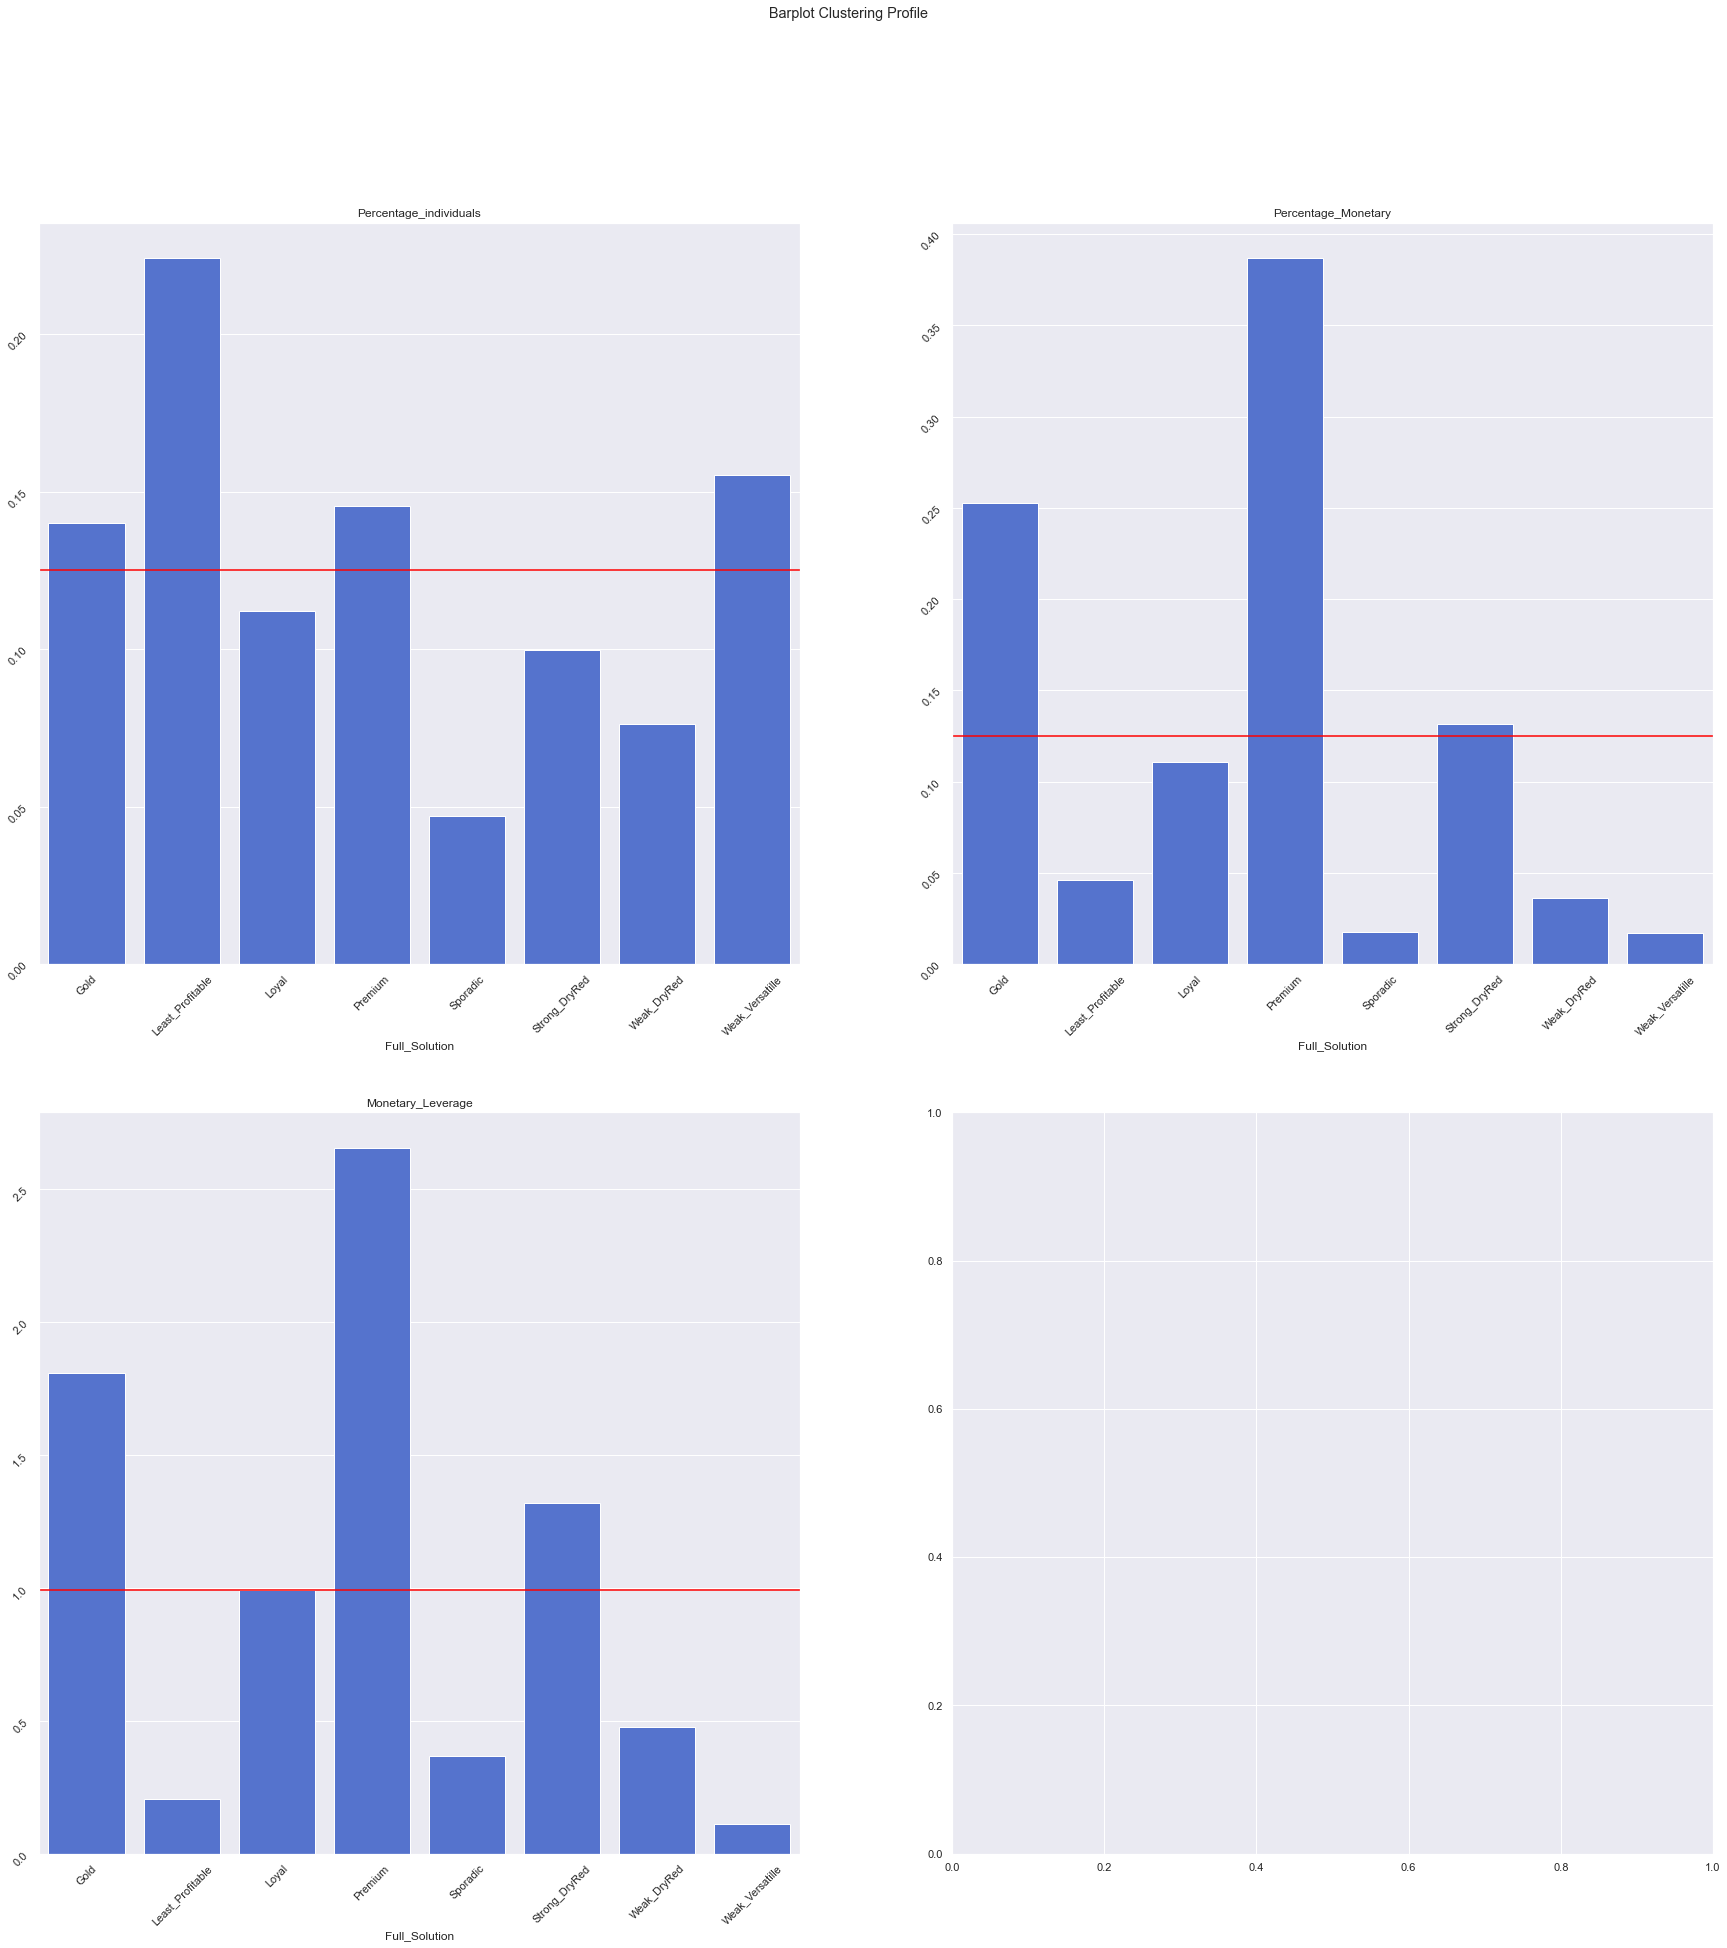

In [91]:
cluster_barplot_profile(lev_analysis.reset_index(),'Full_Solution')

- Leverage Graph 1

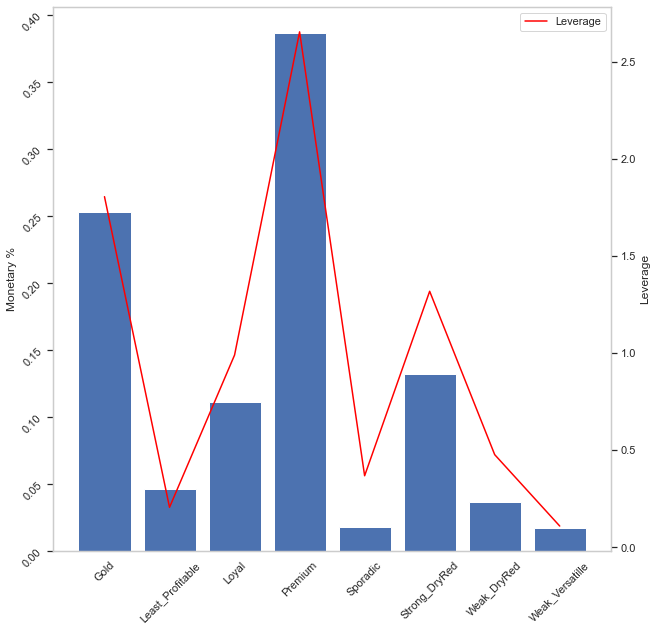

In [92]:
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(10,10))
ax1.bar(height=lev_analysis.iloc[:,1].values, x=lev_analysis.iloc[:,:2].index)
ax1.set_ylabel('Monetary %')
ax2 = ax1.twinx()
ax2.plot(lev_analysis.iloc[:,-1].values,color='red',)
ax2.set_ylabel('Leverage')
#ax1.legend(loc=0,labels = ['Monetary_Percentage'])
ax2.legend(loc = 1,labels = ['Leverage'])
ax1.grid(False)
ax2.grid(False)
ax1.tick_params(rotation= 45)

plt.show()

- Monetary Percentage vs Individual Percentage 

<AxesSubplot:title={'center':'% Monetary vs Cluster size'}, ylabel='Full_Solution'>

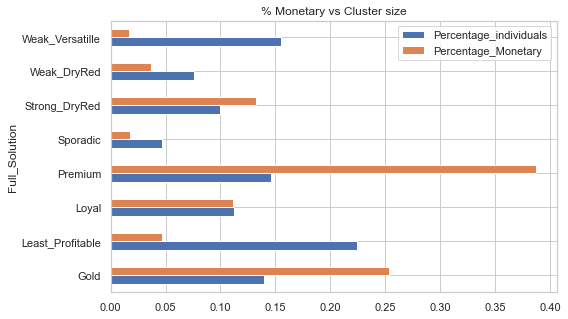

In [93]:
lev_analysis.iloc[:,:2].plot.barh(figsize=(8,5),title='% Monetary vs Cluster size')

- Leverage Graph 2

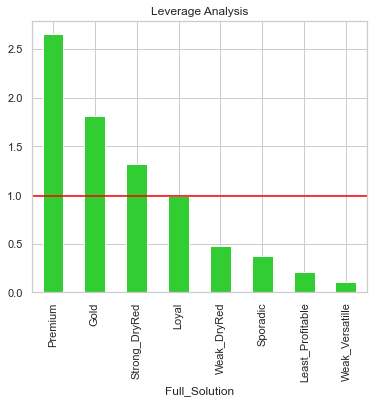

In [94]:
lev_analysis.iloc[:,-1].sort_values(ascending=False).plot.bar(figsize=(6,5),color='limegreen',title='Leverage Analysis' )
plt.axhline(y = lev_analysis.iloc[:,-1].mean(),color='red')

#### Negative LTV Profile

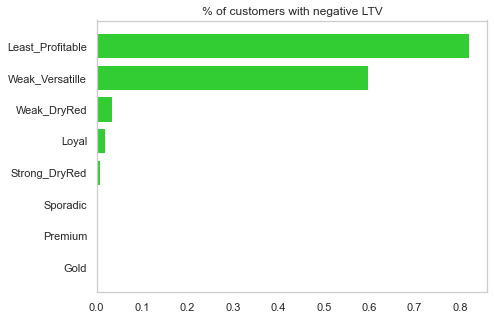

In [95]:
neg_ltv_pct = naming_2.groupby('Full_Solution').mean()['Neg_LTV'].sort_values(ascending=True)
plt.figure(figsize=(7,5))
plt.barh(width=neg_ltv_pct.values,y=neg_ltv_pct.index,color='limegreen')
plt.title('% of customers with negative LTV')
plt.grid(False)
plt.show()

#### Who could spend more? Analysis
- Lower values represent clusters that could spend more in the company

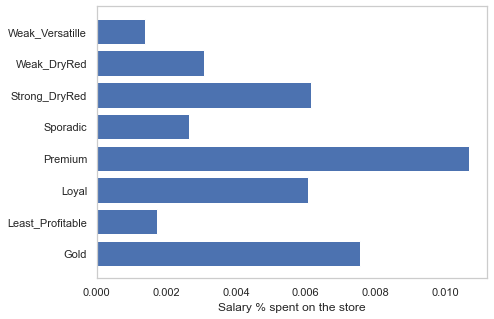

In [96]:
data_pos = data.copy()
data_pos['Avg_Monetary'] = np.round(data_pos['Monetary']/18,2)
data_pos['Full_Solution'] = naming_2['Full_Solution']
pos_growth =data_pos.groupby('Full_Solution').mean()[['Avg_Monetary','Mont_income']]
pos_growth['%_MoneySpent'] = pos_growth['Avg_Monetary']/pos_growth['Mont_income']
plt.figure(figsize=(7,5))
plt.barh(width=pos_growth['%_MoneySpent'].values,y=pos_growth.index)
plt.xlabel('Salary % spent on the store')
plt.grid(False)
plt.show()

#### Multidimensional Visualizatiom

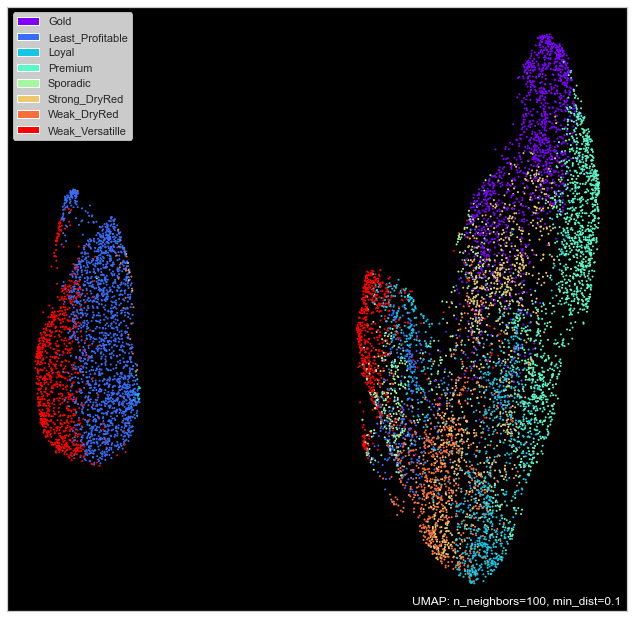

In [97]:
def umap_2 (x_train,y_train, n_neighbors,min_dist,learning_rate):
    import umap,datashader,bokeh,holoviews,skimage,colorcet
    import umap.plot
    reducer = umap.UMAP(n_neighbors=n_neighbors,n_components=2,min_dist=min_dist,learning_rate=learning_rate,random_state=0)
    mapper = reducer.fit(x_train)
    umap.plot.points(mapper, labels=y_train.values, color_key_cmap='rainbow',background = 'black')
    
#     return([embedding,umap_df])


umap_2(naming_2.drop(columns=['Full_Solution']),naming_2['Full_Solution'], 100,0.1,0.5)